# Defining the Question


### a) Specifying the Question

> Hass Consulting Company requires us to **study the factors** that affect housing prices using the given information on real estate properties and to **create a model** that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success



> The metric of success is if we can show the influence of the different factors on the housing prices and create a model that can predict the prices given predictor variables.

### c) Understanding the context

> Hass Consulting Company which is a real estate leader will have an increased advantage in the sector by being able to highlight which factors affect housing prices and how they individually affect the prices. Additionally, a model that predicts the prices will be invaluable in helping the company perform better portfolio management.

### d) Recording the Experimental Design


> The following design was used:


* Data importation
* Data Reading & Cleaning
* EDA
* Feature Engineering
* Multiple Linear Regression
 - Checking multicollinearity
 - Residual plots
 - Assess Heteroskedasticity using Barlett's test.
* Quantile Regression
* Ridge Regression
* Lassor Regression
* Elastic Net Regression


### e) Data Relevance

> This was evaluated against the metric of success (after implementation of solution)

# Data Reading & Cleaning


## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import scipy as sp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Dataset

In [2]:
#load dataset
house = pd.read_csv('Independent Project Week 7 - house_data.csv')

In [3]:
#check head
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#check tail
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#check number of records
house.shape

(21613, 20)

In [6]:
#checking column types
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
#checking summary stats
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#checking for nulls
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

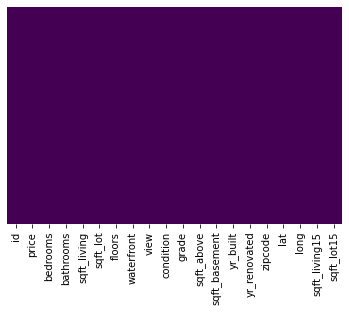

In [9]:
#visually looking at the nulls in the dataset
sns.heatmap(house.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

> from the above we can observe that our dataset is clean, it contains no nulls.

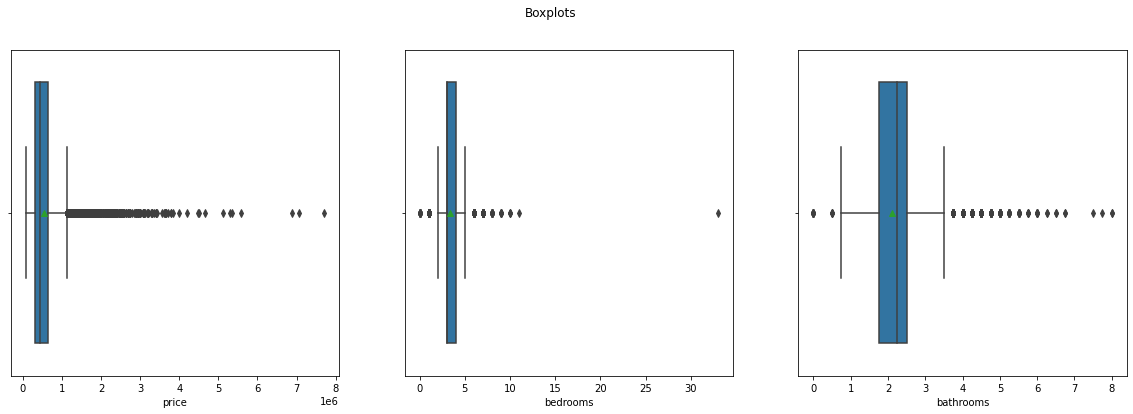

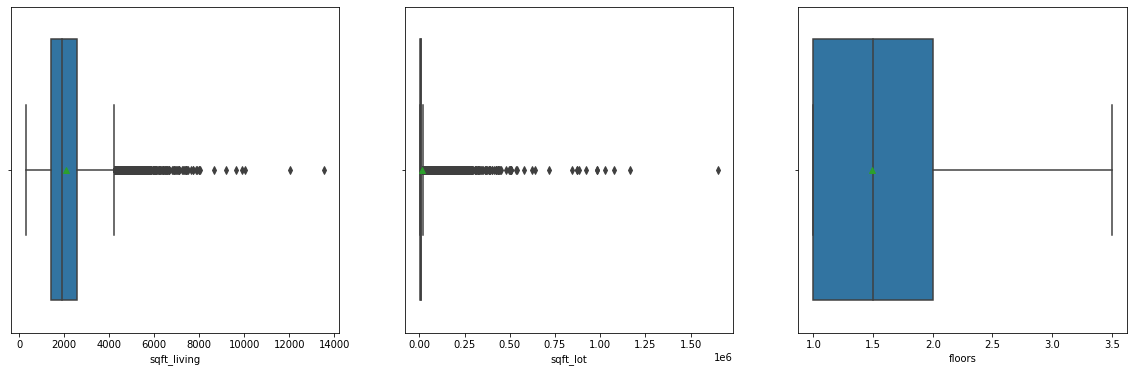

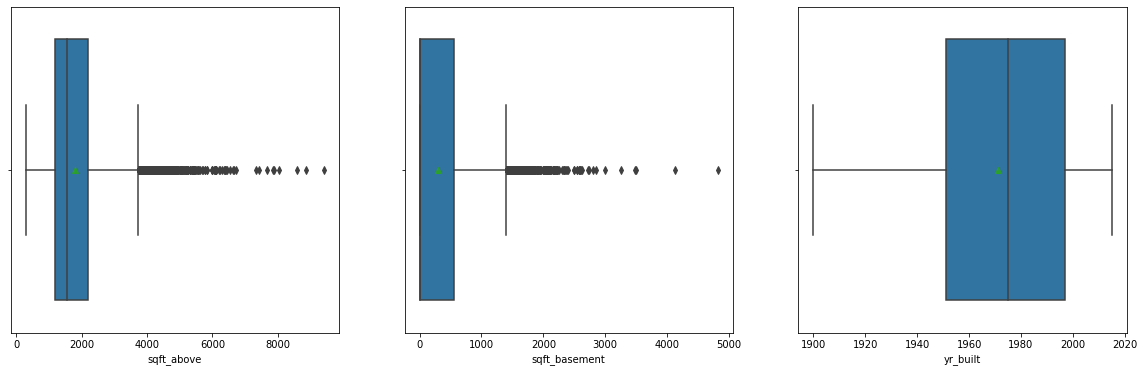

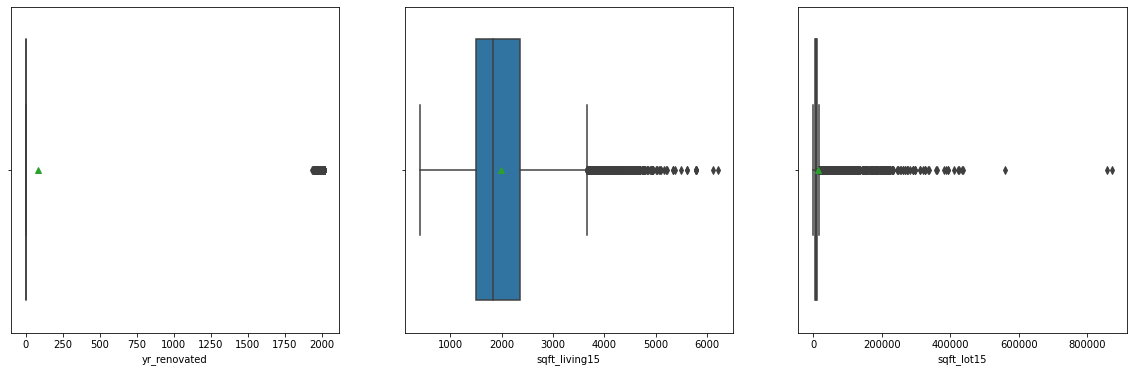

In [10]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = house['price'], ax=ax1, showmeans = True)
sns.boxplot(x = house['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = house['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = house['sqft_lot'], ax=ax5, showmeans = True)
sns.boxplot(x = house['floors'], ax=ax6, showmeans = True)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house['sqft_above'], ax=ax7, showmeans = True)
sns.boxplot(x = house['sqft_basement'], ax=ax8, showmeans = True)
sns.boxplot(x = house['yr_built'], ax=ax9, showmeans = True)

fig, (ax10,ax11,ax12) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house['yr_renovated'], ax=ax10, showmeans = True)
sns.boxplot(x = house['sqft_living15'], ax=ax11, showmeans = True)
sns.boxplot(x = house['sqft_lot15'], ax=ax12, showmeans = True)

plt.show()

# Exploratory Data Analysis

Univariate Analysis

In [11]:
# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode.values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

uni_stats(house)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
id,21613.0,0.0,21436.0,7.950006e+08,4.580302e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,2.876566e+09,0.243329,-1.260542
price,21613.0,0.0,3625.0,3.500000e+05,5.401822e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06,3.673622e+05,4.021716,34.522444
bedrooms,21613.0,0.0,13.0,3.000000e+00,3.370842e+00,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,9.300618e-01,1.974300,49.063653
bathrooms,21613.0,0.0,30.0,2.500000e+00,2.114757e+00,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,7.701632e-01,0.511108,1.279902
sqft_living,21613.0,0.0,1038.0,1.300000e+03,2.079900e+03,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04,9.184409e+02,1.471555,5.243093
sqft_lot,21613.0,0.0,9782.0,5.000000e+03,1.510697e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06,4.142051e+04,13.060019,285.077820
floors,21613.0,0.0,6.0,1.000000e+00,1.494309e+00,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,5.399889e-01,0.616177,-0.484723
waterfront,21613.0,0.0,2.0,0.000000e+00,7.541757e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.651720e-02,11.385108,127.632494
view,21613.0,0.0,5.0,0.000000e+00,2.343034e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,7.663176e-01,3.395750,10.893022
condition,21613.0,0.0,5.0,3.000000e+00,3.409430e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.507430e-01,1.032805,0.525764


> As can be seen from the above summary table:
- Most of the numerical data is in acceptable range for Skew and Kurtosis except sqft_lot (Skew approx 13, Kurtosis approx 285), waterfront (Skew approx 11 and Kurtosis	approx 127) & sqft_lot15 (Skew approx 9 and Kurtosis approx 150)

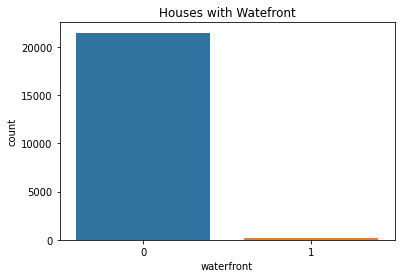

In [12]:
#Count plots
sns.countplot(x='waterfront',data=house)
plt.title('Houses with Watefront')
plt.show()

> Because the dataset was already encoded it is hard to say with certainity what the above 0 and 1 refer to, though from external validation sources on average majority of houses do not have waterfronts. Additionally, it is coding convention to represent False boolean as 0 and the opposite (True) as 1. Taking both points into consideration we can infer to some degree that approximately 20,000 houses didn't have waterfronts compared to those which had(only 2).

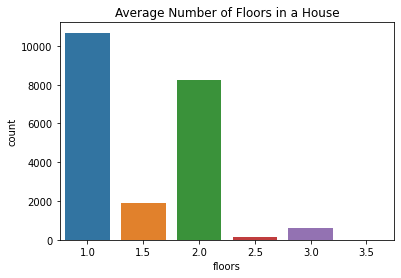

In [13]:
#Count plots
sns.countplot(x='floors',data=house)
plt.title('Average Number of Floors in a House')
plt.show()

> Majority of houses have 1 floor meaning Apartments and/or Bungalows followed by 2 storey homes like Mansionettes, TownHouses etc.

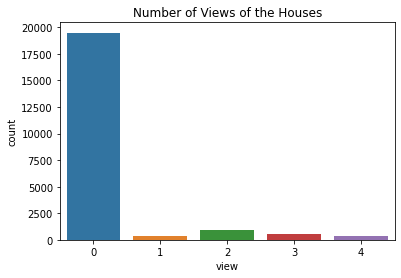

In [14]:
#Count plots
sns.countplot(x='view',data=house)
plt.title('Number of Views of the Houses')
plt.show()

> We can note that majority of the houses were not viewed. This may be exaggerated since this is only a limited time span of the data and other factors such as the season may affect this e.g. in winter most people aren't looking to move houses as compared to summer.

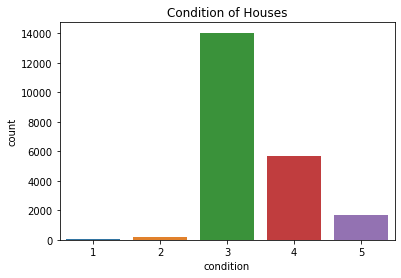

In [15]:
#Count plots
sns.countplot(x='condition',data=house)
plt.title('Condition of Houses')
plt.show()

> Without the grading metric it is hard to interprete the above but intuitively most of the houses seem to have an average condition (not too bad and not great like newly built houses) which is expected with wear and tear over the years after it was built.

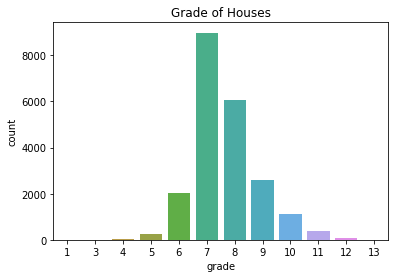

In [16]:
#Count plots
sns.countplot(x='grade',data=house)
plt.title('Grade of Houses')
plt.show()

> Assuming this is grading by an objective person like a building inspector it shows that it goes in line with the condition of the house we previously saw. The distribution (Higher values for average grades) is the same with the house condition rating distribution.

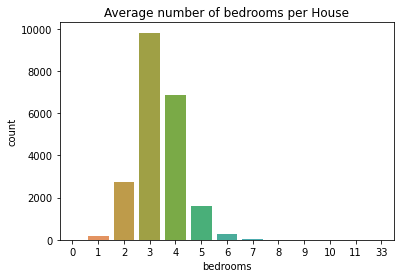

In [17]:
#Count plots
sns.countplot(x='bedrooms',data=house)
plt.title('Average number of bedrooms per House')
plt.show()

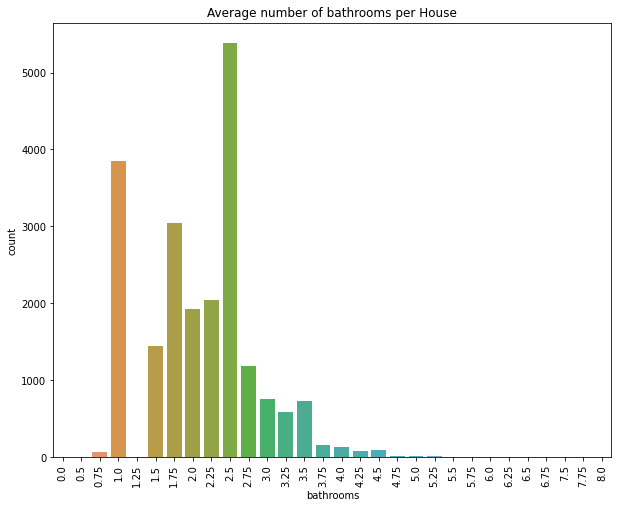

In [18]:
#Count plots
plt.figure(figsize=(10,8))
sns.countplot(x='bathrooms',data=house)
plt.title('Average number of bathrooms per House')
plt.xticks(rotation =90)
plt.show()

> The majority number of houses have on average between 1-2.5 bathrooms which tallies with the number of bedrooms which are mostly 3 meaning that most people share bathrooms.

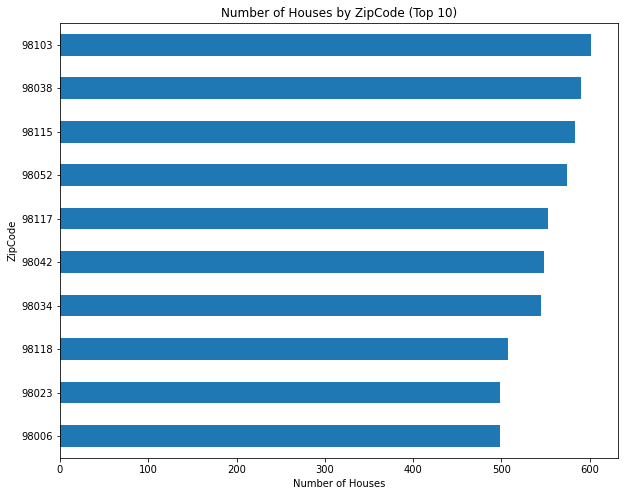

In [21]:
#Zipcode Top 10
plt.figure(figsize = [10,8])
top_10 = house['zipcode'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Houses')
plt.ylabel('ZipCode')
plt.title('Number of Houses by ZipCode (Top 10)')
plt.show()

> Majority of houses are in the ZipCodes: 98103, 98038 and 98115 making up the top 3.

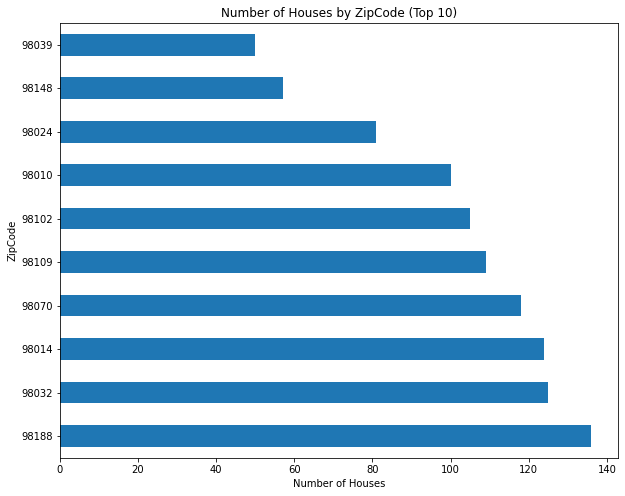

In [23]:
#Zipcode Bottom 10
plt.figure(figsize = [10,8])
top_10 = house['zipcode'].value_counts().sort_values(ascending=True).head(10)
top_10.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Number of Houses')
plt.ylabel('ZipCode')
plt.title('Number of Houses by ZipCode (Top 10)')
plt.show()

> ZipCodes with the least number of houses in the dataset: 98039, 98148 and 98024 making up the bottom 3.

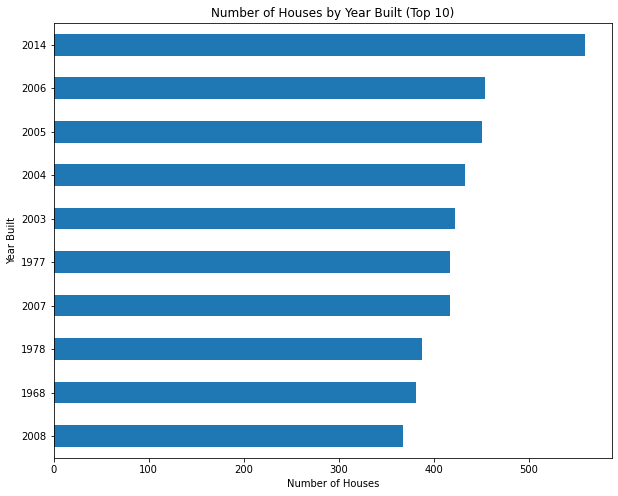

In [24]:
#Year Built Top 10
plt.figure(figsize = [10,8])
top_10 = house['yr_built'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Houses')
plt.ylabel('Year Built')
plt.title('Number of Houses by Year Built (Top 10)')
plt.show()

> Majority of houses were built in 2014. There's also a high number of old houses (1968, 1977 and 1978).

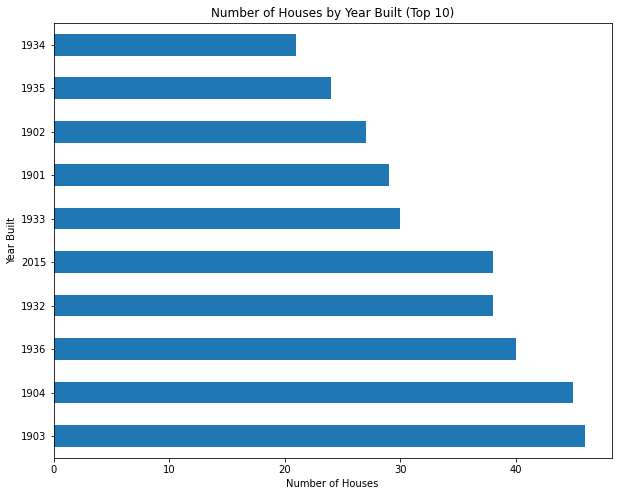

In [25]:
#Year Built Bottom 10
plt.figure(figsize = [10,8])
top_10 = house['yr_built'].value_counts().sort_values(ascending=True).head(10)
top_10.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Number of Houses')
plt.ylabel('Year Built')
plt.title('Number of Houses by Year Built (Top 10)')
plt.show()

> Least number of houses were built in the period of 1934-1935. We may infer a downturn in construction business (economic depression) and not necessarily low population because there years before and after the mentioned period with a higher number of houses built.

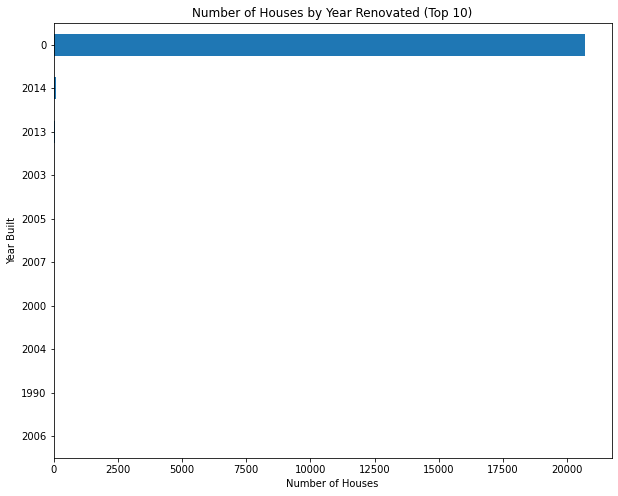

In [26]:
#Year Renovated Top 10
plt.figure(figsize = [10,8])
top_10 = house['yr_renovated'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Houses')
plt.ylabel('Year Built')
plt.title('Number of Houses by Year Renovated (Top 10)')
plt.show()

In [29]:
#numerically the above
house['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

> We can observe that an overwhelming majority of the houses in the dataset have not been renovated which aligns with the observations that a majority of houses were built in recent years thus wouldn't require renovation.

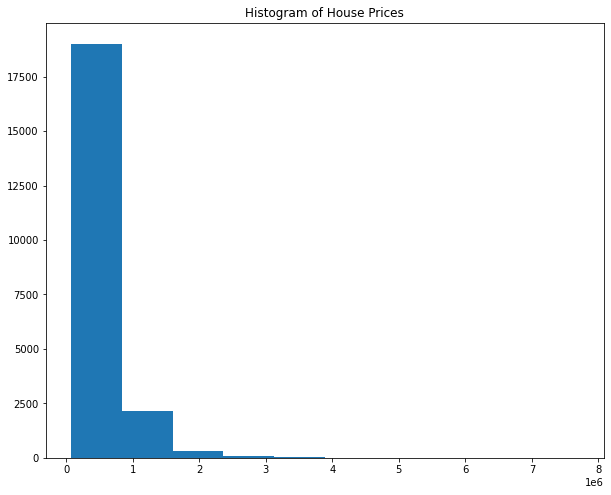

In [30]:
#Histogram of home scores
plt.figure(figsize = [10,8])
plt.hist(house['price'])
plt.title('Histogram of House Prices')
plt.show()

> Right skewed which was highlighted in the summary table.

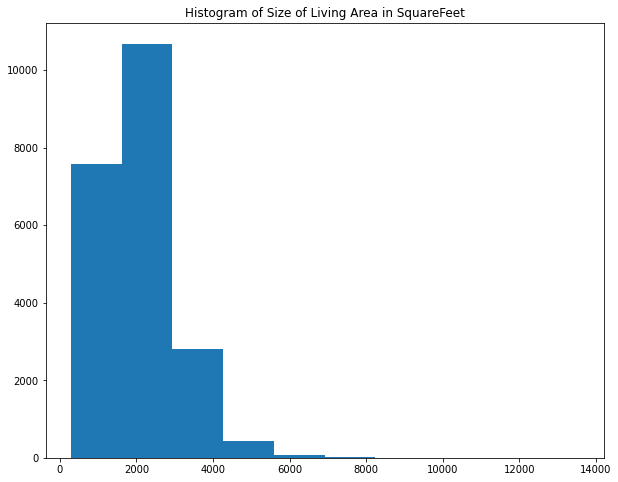

In [31]:
#Histogram of Size of Living Area in SquareFeet
plt.figure(figsize = [10,8])
plt.hist(house['sqft_living'])
plt.title('Histogram of Size of Living Area in SquareFeet')
plt.show()

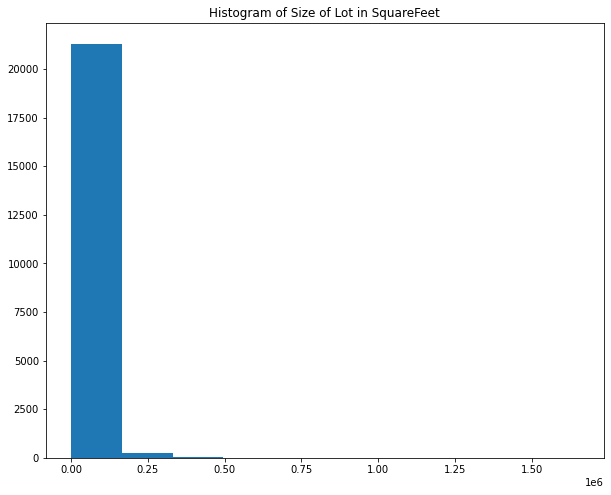

In [32]:
#Histogram of Size of Lot in SquareFeet
plt.figure(figsize = [10,8])
plt.hist(house['sqft_lot'])
plt.title('Histogram of Size of Lot in SquareFeet')
plt.show()

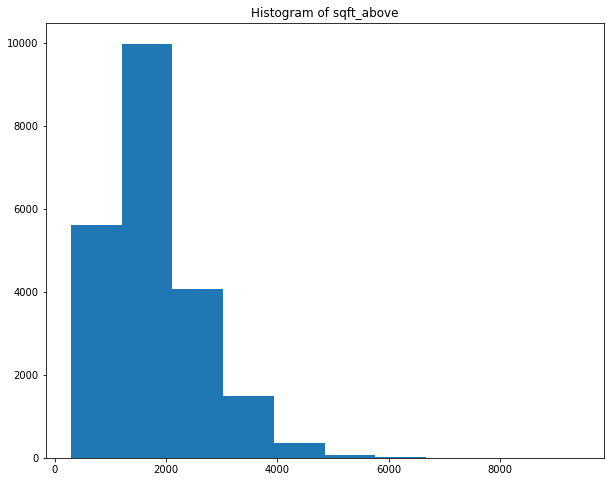

In [33]:
#Histogram of Sqft_above(floors above basement??)
plt.figure(figsize = [10,8])
plt.hist(house['sqft_above'])
plt.title('Histogram of sqft_above')
plt.show()

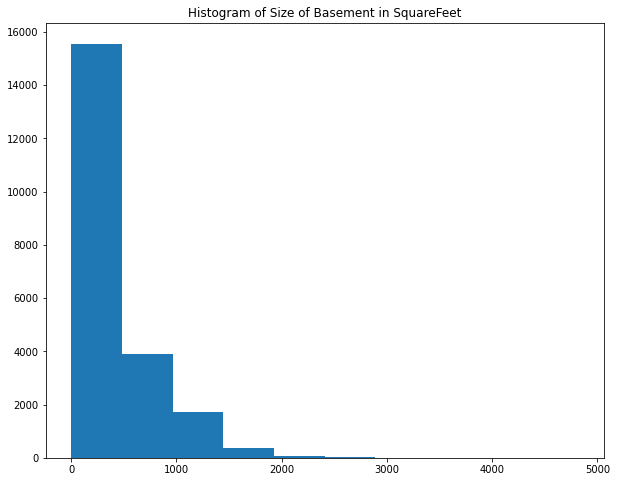

In [34]:
#Histogram of Size of Basement in SquareFeet
plt.figure(figsize = [10,8])
plt.hist(house['sqft_basement'])
plt.title('Histogram of Size of Basement in SquareFeet')
plt.show()

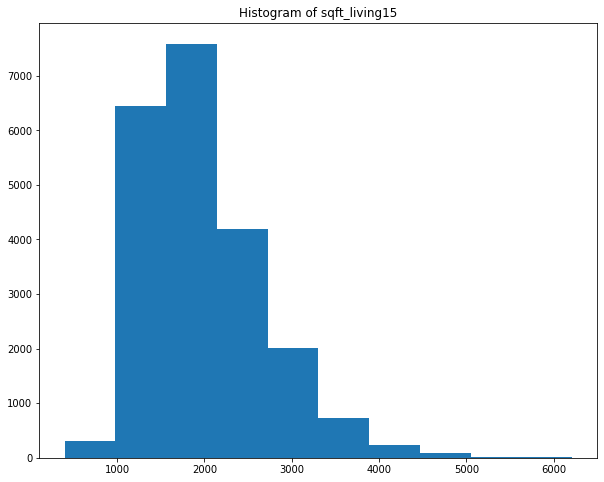

In [35]:
#Histogram of sqft_living15
plt.figure(figsize = [10,8])
plt.hist(house['sqft_living15'])
plt.title('Histogram of sqft_living15')
plt.show()

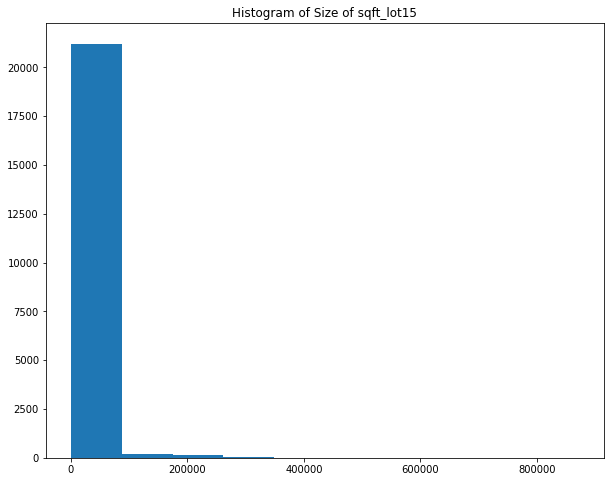

In [36]:
#Histogram of sqft_lot15
plt.figure(figsize = [10,8])
plt.hist(house['sqft_lot15'])
plt.title('Histogram of Size of sqft_lot15')
plt.show()

> As expected most of the histograms are right skewed because of the increase in House prices with increase in factors such as increased living area size, basement size, lot size and such. In general increase in size of a house and its property (lot) will usually result in a similar uptrend in cost/price of the house.

Bivariate Analysis

In [37]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Figure size 432x288 with 0 Axes>

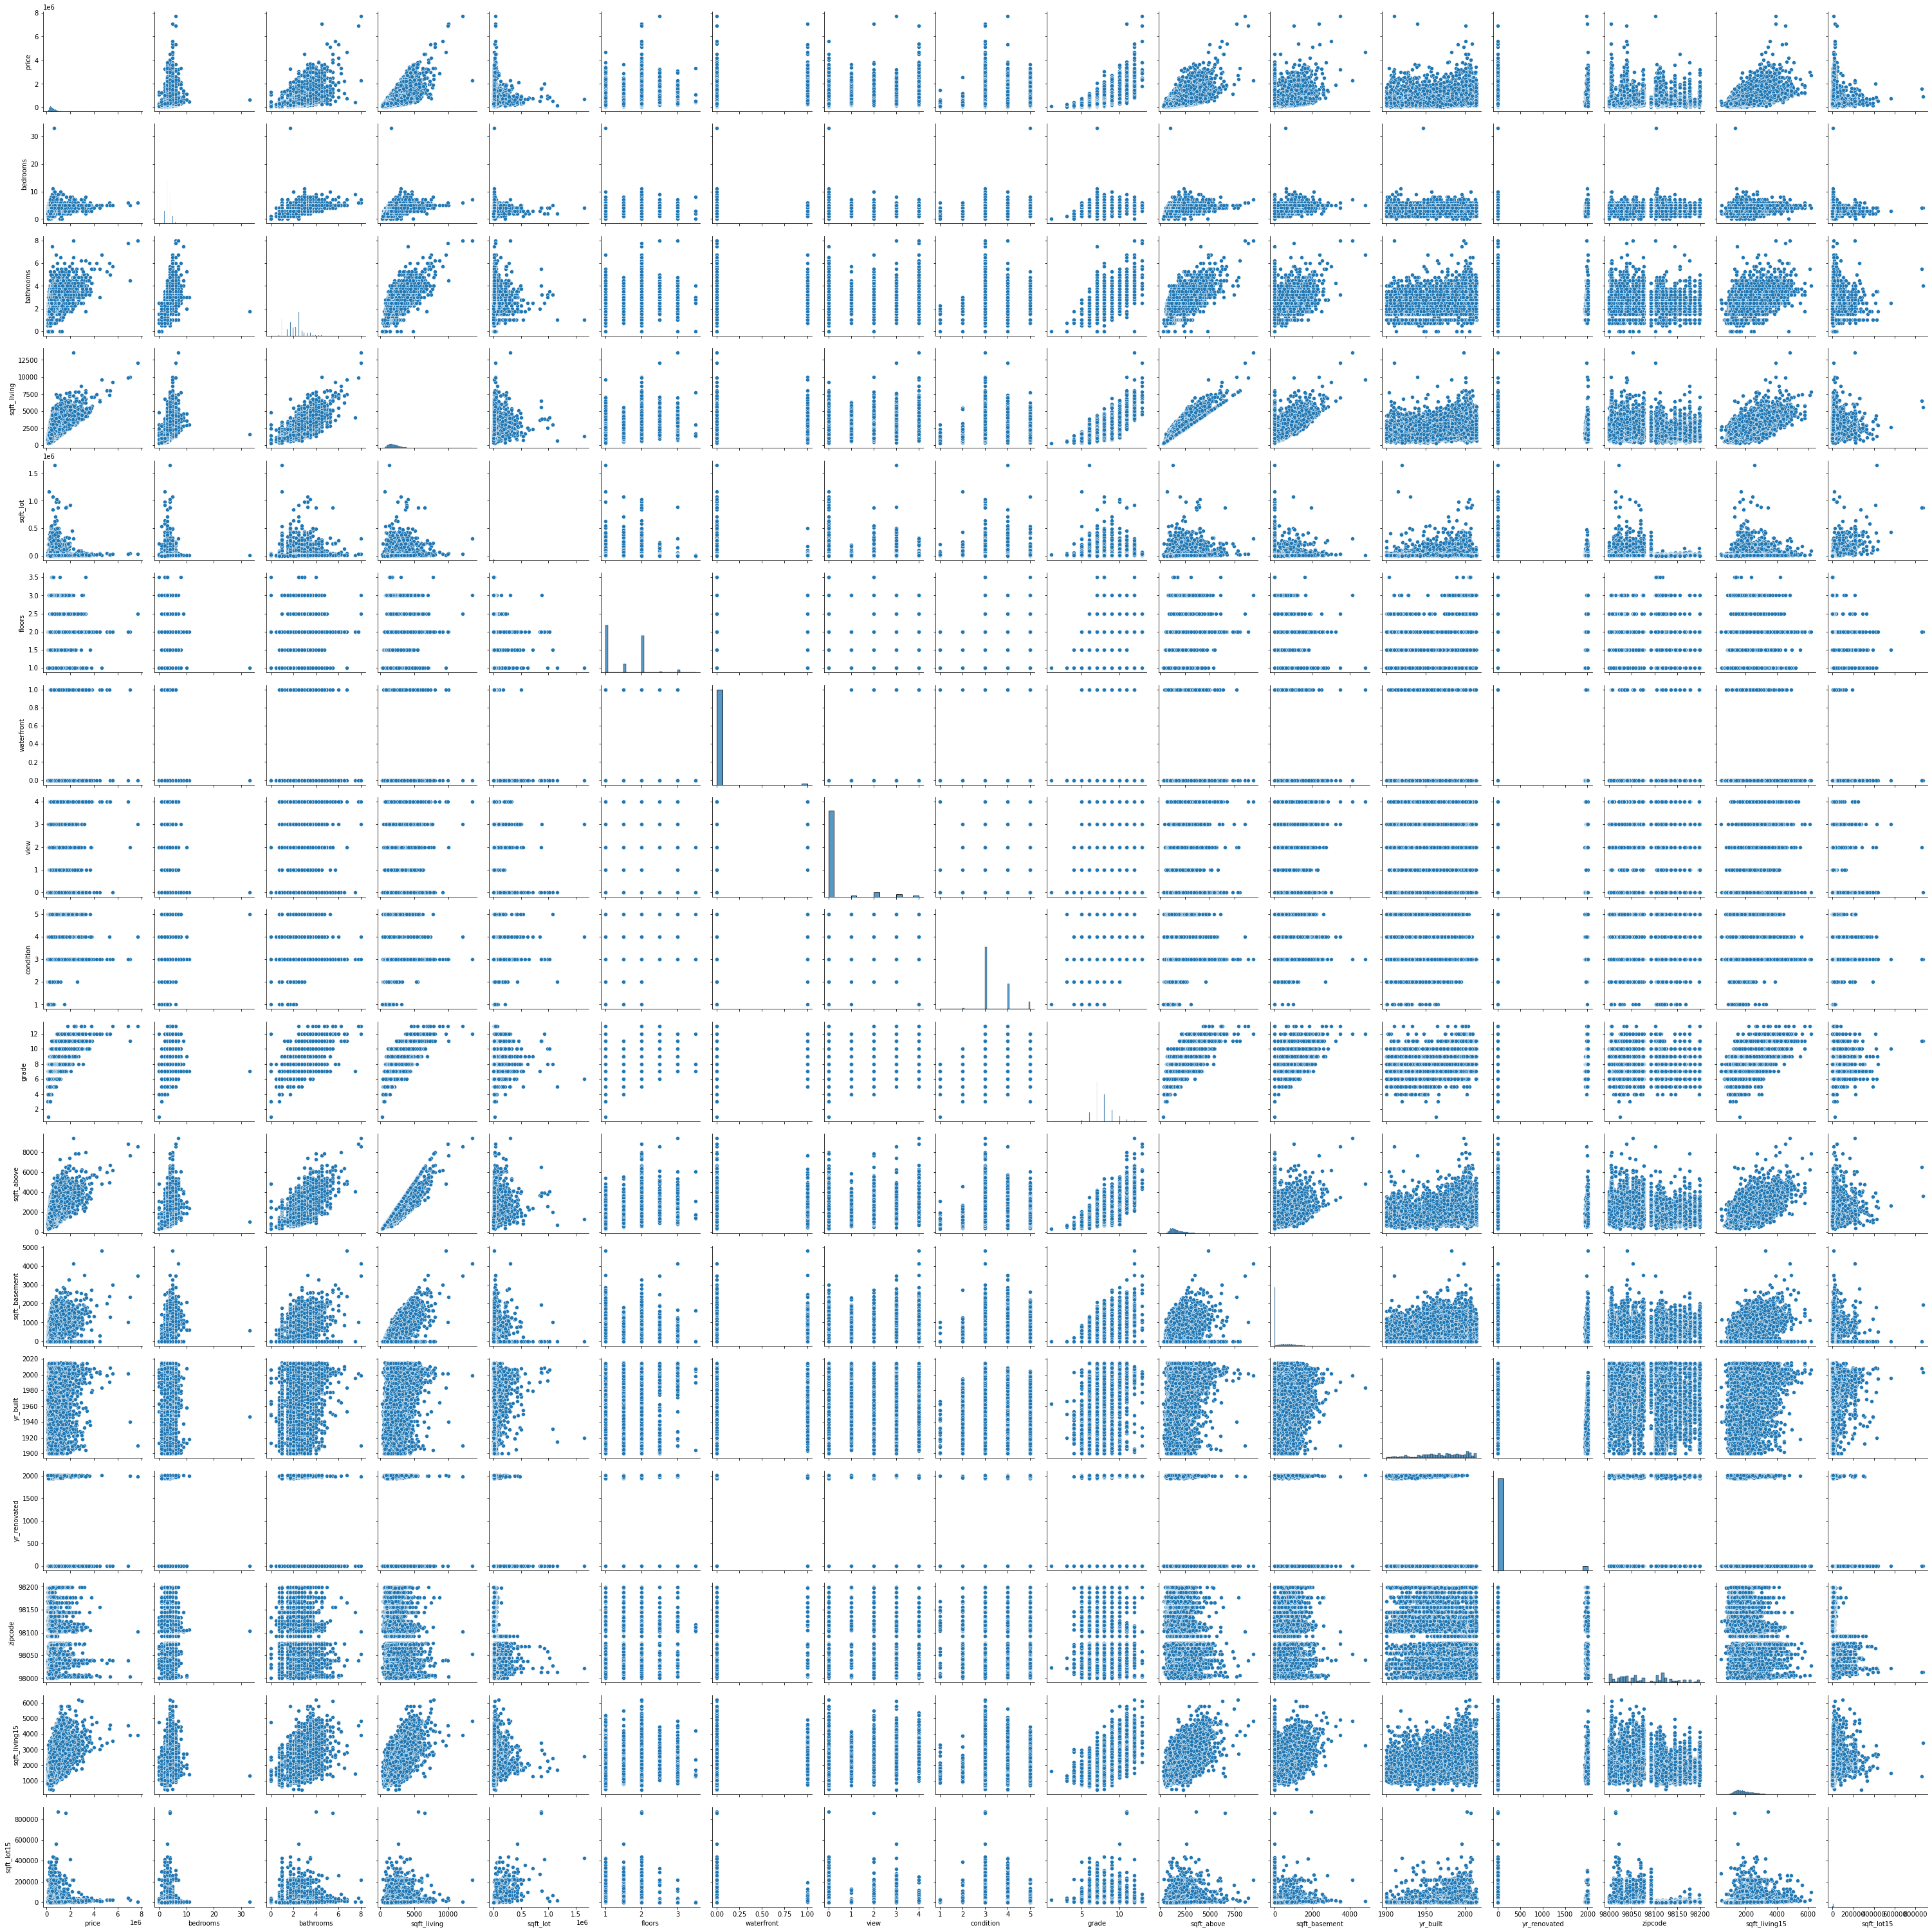

In [38]:
#create df's to plot pairplot(leaving out id and long and lat)
df_p = house.drop(['id', 'lat', 'long'], axis=1)
df_p

# Plot the pairplot
plt.figure()
sns.pairplot(df_p)
plt.show()


> From the above pairplot we can see interesting relationships between the label(Price) and features especially sqft_living, sqft_above, sqft_basement and sqft_living15 which exhibit a positive linear relationship.

In [39]:
#Correlations
house.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


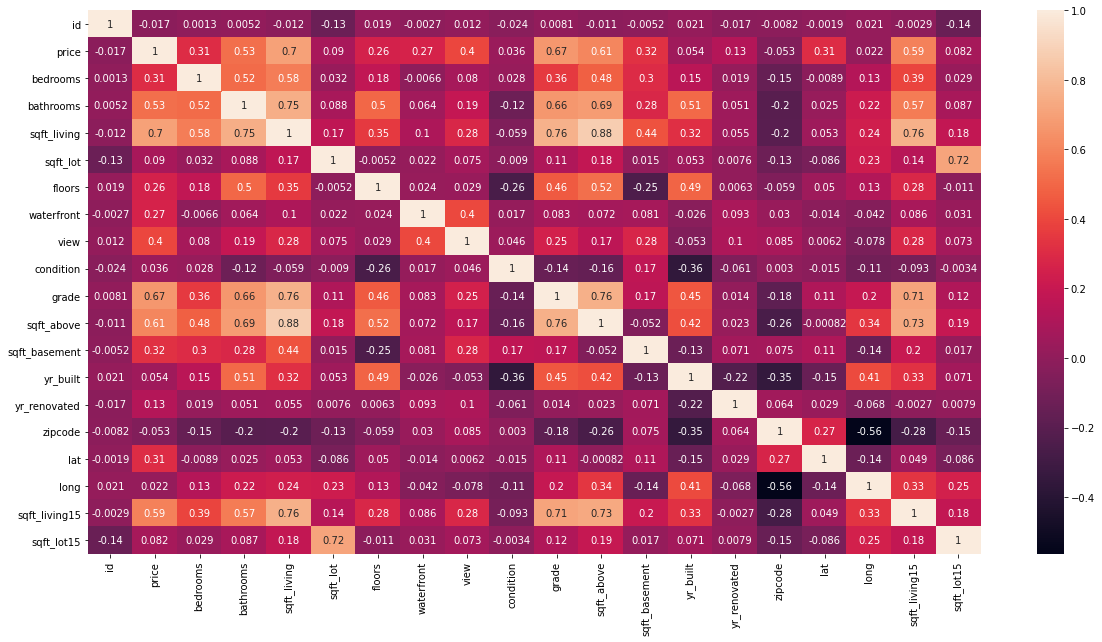

In [40]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(house.corr(),annot=True)
plt.show()

> Highlights off the heatmap:
- Price has a high positive correlation with sqft_living, grade and sqft_above
- sqft_living has a high positive correlation with bathrooms, sqft_above and grade, sqft_living15
- sqft_lot and sqft_lot15 are highly correlated
- grade has a high correlation with sqft_living, sqft_above and sqft_living15 


Multivariate Analysis

In [41]:
#LDA
#perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)

#features and label
X_lda = house.drop(['id', 'price'], axis=1) 
y_lda = house['price']

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, test_size = 0.2, random_state = 0)

X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [42]:
#show co-efficients of the columns
lda.coef_

array([[-2.54217026e+00, -6.45249743e+00,  1.88812593e-03, ...,
         1.99661063e+01, -1.10914683e-03,  2.90759403e-05],
       [-7.76317916e-01, -3.36261089e-02, -1.28454802e-03, ...,
         5.23629150e+00,  2.70958094e-03, -2.55705308e-06],
       [-2.79606163e+00,  1.22681824e+00, -8.64213220e-05, ...,
         2.79085567e+01, -7.20206946e-04, -9.83276847e-06],
       ...,
       [-6.47762698e+00,  1.34507267e+01,  1.62737020e-02, ...,
        -3.16059331e+01, -7.96402254e-03,  7.93628165e-06],
       [-7.36466753e+00, -4.59884398e+00,  2.41440105e-02, ...,
        -2.45665757e+01, -7.36176442e-03, -7.09163186e-05],
       [-1.00902997e+01,  9.45945823e+00,  2.45489994e-02, ...,
        -1.52838366e+01, -1.17731477e-02, -8.30236731e-05]])

In [43]:
#creating a df to store the features that have highest co-efficients
feat_matters = pd.DataFrame(index=X_lda.columns.values, data = lda.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
long,19.966106
floors,1.456048
yr_built,0.146056
zipcode,0.013098
sqft_basement,0.002318
sqft_living,0.001888
sqft_above,0.000847
sqft_lot15,0.000029
sqft_lot,-0.000023
yr_renovated,-0.000419


> The individual features appear not to explain a good degree(%) of the variance in the label. Therefore, it wouldn't be advisable performing Data Reduction.

Dealing with Anomalies

In [61]:
#create copy
house_c = house.copy(deep=True)

In [62]:
#Dealing with anomalies
def outlier_determination(d_column):
 sorted(d_column)
 Q1,Q3 = np.percentile(d_column, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_living15
lowerbound,upperbound = outlier_determination(house_c.sqft_living15)
print('sqft_living15: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
#median = house_c['sqft_living15'].median()
q_10 = house_c['sqft_living15'].quantile(0.10)
q_90 = house_c['sqft_living15'].quantile(0.90)

house_c['sqft_living15'] = np.where(house_c['sqft_living15'] <q_10, q_10,house_c['sqft_living15'])
house_c['sqft_living15'] = np.where(house_c['sqft_living15'] >q_90, q_90,house_c['sqft_living15'])


#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_basement
lowerbound,upperbound = outlier_determination(house_c.sqft_basement)
print('sqft_basement: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_c['sqft_basement'].quantile(0.10)
q_90 = house_c['sqft_basement'].quantile(0.90)

house_c['sqft_living15'] = np.where(house_c['sqft_basement'] <q_10, q_10,house_c['sqft_basement'])
house_c['sqft_living15'] = np.where(house_c['sqft_basement'] >q_90, q_90,house_c['sqft_basement'])


#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_lot15
lowerbound,upperbound = outlier_determination(house_c.sqft_lot15)
print('sqft_lot15: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_c['sqft_lot15'].quantile(0.10)
q_90 = house_c['sqft_lot15'].quantile(0.90)

house_c['sqft_lot15'] = np.where(house_c['sqft_lot15'] <q_10, q_10,house_c['sqft_lot15'])
house_c['sqft_lot15'] = np.where(house_c['sqft_lot15'] >q_90, q_90,house_c['sqft_lot15'])

#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_above
lowerbound,upperbound = outlier_determination(house_c.sqft_above)
print('sqft_above: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_c['sqft_above'].quantile(0.10)
q_90 = house_c['sqft_above'].quantile(0.90)

house_c['sqft_above'] = np.where(house_c['sqft_above'] <q_10, q_10,house_c['sqft_above'])
house_c['sqft_above'] = np.where(house_c['sqft_above'] >q_90, q_90,house_c['sqft_above'])


#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_living
lowerbound,upperbound = outlier_determination(house_c.sqft_living)
print('sqft_living: ',lowerbound,',',upperbound)


#imputing the outliers with 10th and 90th Q's
q_10 = house_c['sqft_living'].quantile(0.10)
q_90 = house_c['sqft_living'].quantile(0.90)

house_c['sqft_living'] = np.where(house_c['sqft_living'] <q_10, q_10,house_c['sqft_living'])
house_c['sqft_living'] = np.where(house_c['sqft_living'] >q_90, q_90,house_c['sqft_living'])

#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_lot
lowerbound,upperbound = outlier_determination(house_c.sqft_lot)
print('sqft_lot: ',lowerbound,',',upperbound)


#imputing the outliers with 10th and 90th Q's
q_10 = house_c['sqft_lot'].quantile(0.10)
q_90 = house_c['sqft_lot'].quantile(0.90)

house_c['sqft_lot'] = np.where(house_c['sqft_lot'] <q_10, q_10,house_c['sqft_lot'])
house_c['sqft_lot'] = np.where(house_c['sqft_lot'] >q_90, q_90,house_c['sqft_lot'])


#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_bedrooms
lowerbound,upperbound = outlier_determination(house_c.bedrooms)
print('bedrooms: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_c['bedrooms'].quantile(0.10)
q_90 = house_c['bedrooms'].quantile(0.90)

house_c['bedrooms'] = np.where(house_c['bedrooms'] <q_10, q_10,house_c['bedrooms'])
house_c['bedrooms'] = np.where(house_c['bedrooms'] >q_90, q_90,house_c['bedrooms'])


#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# sqft_bathrooms
lowerbound,upperbound = outlier_determination(house_c.bathrooms)
print('bathrooms: ',lowerbound,',',upperbound)

#imputing the outliers with 10th and 90th Q's
q_10 = house_c['bathrooms'].quantile(0.10)
q_90 = house_c['bathrooms'].quantile(0.90)

house_c['bathrooms'] = np.where(house_c['bathrooms'] <q_10, q_10,house_c['bathrooms'])
house_c['bathrooms'] = np.where(house_c['bathrooms'] >q_90, q_90,house_c['bathrooms'])

#getting the bounds
#going by the boxplots we choose the columns with visible outliers
# Price
lowerbound,upperbound = outlier_determination(house_c.price)
print('price: ',lowerbound,',',upperbound)


#imputing the outliers with 10th and 90th Q's
q_10 = house_c['price'].quantile(0.10)
q_90 = house_c['price'].quantile(0.90)

house_c['price'] = np.where(house_c['price'] <q_10, q_10,house_c['price'])
house_c['price'] = np.where(house_c['price'] >q_90, q_90,house_c['price'])


sqft_living15:  185.0 , 3665.0
sqft_basement:  -840.0 , 1400.0
sqft_lot15:  -2374.5 , 17557.5
sqft_above:  -340.0 , 3740.0
sqft_living:  -257.5 , 4234.5
sqft_lot:  -3432.0 , 19160.0
bedrooms:  1.5 , 5.5
bathrooms:  0.625 , 3.625
price:  -162625.0 , 1129575.0


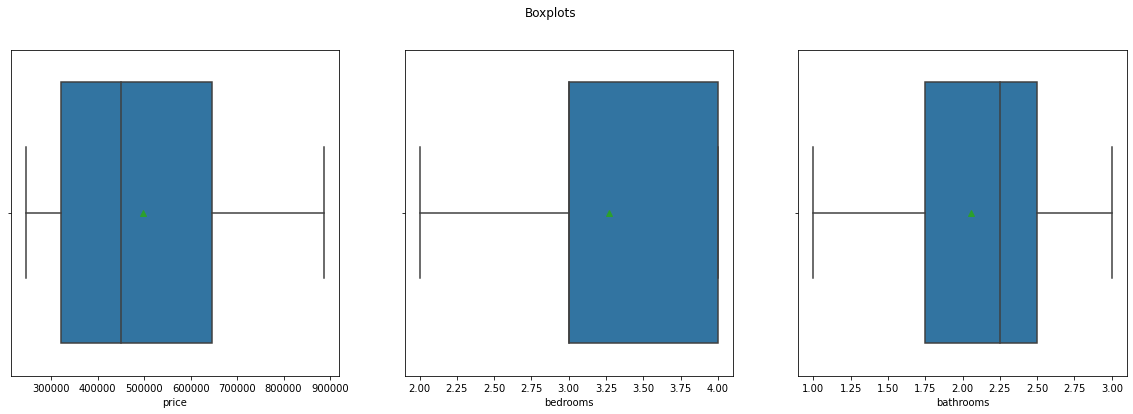

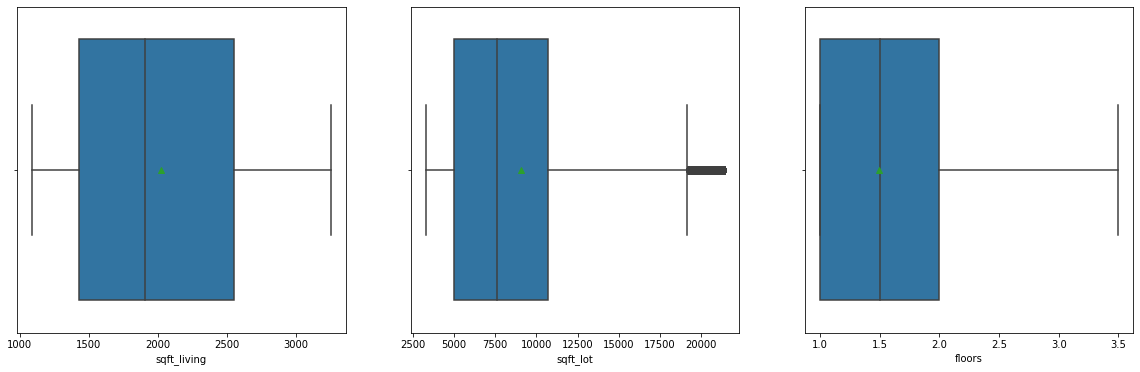

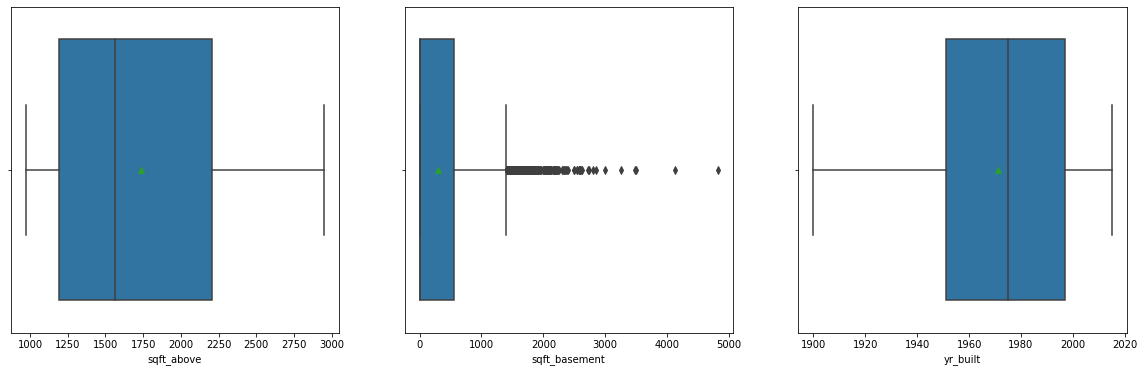

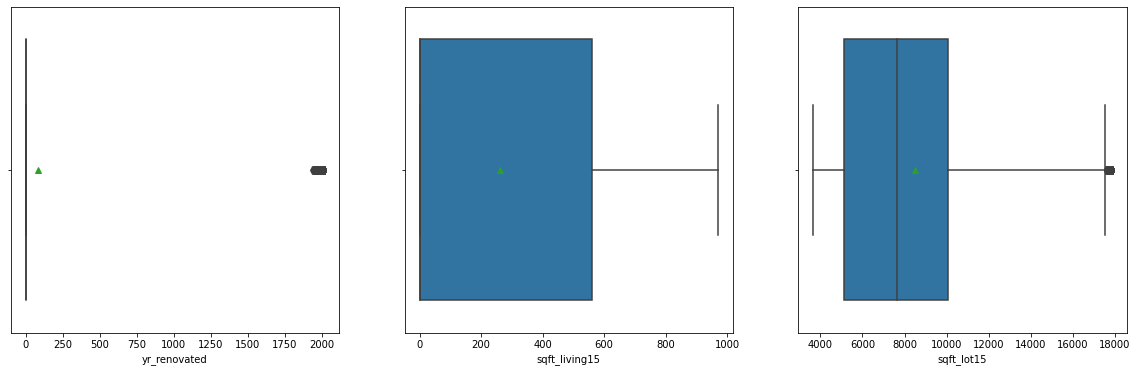

In [63]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Boxplots')
sns.boxplot(x = house_c['price'], ax=ax1, showmeans = True)
sns.boxplot(x = house_c['bedrooms'], ax=ax2, showmeans = True)
sns.boxplot(x = house_c['bathrooms'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house_c['sqft_living'], ax=ax4, showmeans = True)
sns.boxplot(x = house_c['sqft_lot'], ax=ax5, showmeans = True)
sns.boxplot(x = house_c['floors'], ax=ax6, showmeans = True)

fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house_c['sqft_above'], ax=ax7, showmeans = True)
sns.boxplot(x = house_c['sqft_basement'], ax=ax8, showmeans = True)
sns.boxplot(x = house_c['yr_built'], ax=ax9, showmeans = True)

fig, (ax10,ax11,ax12) = plt.subplots(1,3, figsize=(20, 6))
sns.boxplot(x = house_c['yr_renovated'], ax=ax10, showmeans = True)
sns.boxplot(x = house_c['sqft_living15'], ax=ax11, showmeans = True)
sns.boxplot(x = house_c['sqft_lot15'], ax=ax12, showmeans = True)

plt.show()

> Dealt with Anomalies by imputation usimg the median which is robust to outliers since outliers will negatively affect the accuracy of the models created. Above are the boxplots showing visually how the distribution of data looks like after handling outliers.

# Feature Engineering


Here the data will be worked on to ensure features that will create the best possible models.

In [64]:
#dropping unwanted columns id, lat,long
house_c.drop(['id','lat','long'], axis=1, inplace=True)

In [65]:
#adding a column of time since last renovation
house_c['last_renovation'] = house_c['yr_renovated'] - house_c['yr_built']
house_c['last_renovation'] = np.where(house_c['last_renovation'] < 0, 0,house_c['last_renovation'])
house_c.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation
0,245000.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,1955,0,98178,0.0,5650.0,0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,1951,1991,98125,400.0,7639.0,40
2,245000.0,2.0,1.00,1090.0,10000.0,1.0,0,0,3,6,970.0,0,1933,0,98028,0.0,8062.0,0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,1965,0,98136,910.0,5000.0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,1987,0,98074,0.0,7503.0,0


# Implementing the Solution

## Multiple Linear Regression

### Checking multicollinearity


In [84]:
#multicollinearity test
# Let's display the correlations between the variables
correlations = house_c.corr()

correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation
price,1.000000,0.333782,0.482676,0.668115,0.160844,0.297385,0.126112,0.319270,0.040133,0.681494,0.570402,0.288534,0.057512,0.113215,-0.036734,0.258931,0.150294,0.115347
bedrooms,0.333782,1.000000,0.522894,0.612084,0.173569,0.199643,-0.013292,0.066550,0.019231,0.388876,0.518484,0.253416,0.204179,0.011308,-0.188901,0.242332,0.174685,0.013687
bathrooms,0.482676,0.522894,1.000000,0.724986,0.113938,0.516191,0.045332,0.151790,-0.123583,0.633856,0.658723,0.249629,0.541344,0.040571,-0.225296,0.230148,0.108234,0.041761
sqft_living,0.668115,0.612084,0.724986,1.000000,0.320246,0.359450,0.074546,0.244671,-0.056898,0.724247,0.851427,0.399399,0.331589,0.054929,-0.204997,0.359962,0.309102,0.047048
sqft_lot,0.160844,0.173569,0.113938,0.320246,1.000000,-0.141008,0.105940,0.141250,0.048567,0.243209,0.294415,0.104212,0.065976,0.024374,-0.273302,0.061066,0.905043,-0.016050
floors,0.297385,0.199643,0.516191,0.359450,-0.141008,1.000000,0.023698,0.029444,-0.263768,0.458183,0.556824,-0.245705,0.489319,0.006338,-0.059121,-0.267642,-0.153594,0.015068
waterfront,0.126112,-0.013292,0.045332,0.074546,0.105940,0.023698,1.000000,0.401857,0.016653,0.082775,0.057923,0.080588,-0.026161,0.092885,0.030285,0.053044,0.116845,0.060922
view,0.319270,0.066550,0.151790,0.244671,0.141250,0.029444,0.401857,1.000000,0.045990,0.251321,0.149707,0.276947,-0.053440,0.103917,0.084827,0.234221,0.145199,0.084434
condition,0.040133,0.019231,-0.123583,-0.056898,0.048567,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.167229,0.174105,-0.361417,-0.060618,0.003026,0.182896,0.060599,-0.064873
grade,0.681494,0.388876,0.633856,0.724247,0.243209,0.458183,0.082775,0.251321,-0.144674,1.000000,0.721906,0.168392,0.446963,0.014414,-0.184862,0.116253,0.248272,0.011751


In [85]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation
price,2.698943,0.197532,-0.140398,-1.285590,0.066151,-0.203144,-0.051520,-0.202855,-0.122394,-1.390729,0.243208,0.200801,0.859759,-0.087075,0.003795,-0.103256,0.115186,0.076685
bedrooms,0.197532,1.731667,-0.423148,-0.663152,0.098742,0.090270,0.043219,0.093752,-0.071697,0.113915,-0.421909,0.130512,0.165446,0.051109,0.089862,-0.307750,-0.064204,-0.006544
bathrooms,-0.140398,-0.423148,3.305446,-0.755961,-0.018398,-0.652550,-0.023389,-0.022226,-0.192246,-0.174156,-0.411390,0.253811,-1.113400,0.021260,0.098344,-0.939042,0.211962,-0.323669
sqft_living,-1.285590,-0.663152,-0.755961,26.355889,-0.320753,1.057863,0.082885,0.357964,-0.014967,0.317309,-23.097987,-1.357410,-0.377564,0.054915,-0.258216,-10.598983,-0.172109,0.023891
sqft_lot,0.066151,0.098742,-0.018398,-0.320753,5.654355,0.131555,0.013654,-0.001460,0.097353,0.033236,-0.205926,-0.264721,0.252422,-0.038672,0.071060,0.270864,-4.967701,0.090659
floors,-0.203144,0.090270,-0.652550,1.057863,0.131555,2.301204,-0.054732,0.003323,0.073571,-0.154831,-1.562291,0.195582,-0.482636,0.090920,-0.247185,-0.057531,0.427606,-0.192223
waterfront,-0.051520,0.043219,-0.023389,0.082885,0.013654,-0.054732,1.214350,-0.473978,-0.003753,0.071283,-0.029203,-0.137185,-0.005511,-0.177904,-0.011683,0.138099,-0.116333,0.128631
view,-0.202855,0.093752,-0.022226,0.357964,-0.001460,0.003323,-0.473978,1.414962,-0.007851,-0.157888,-0.367453,-0.568486,0.088689,-0.084033,-0.126210,0.148702,-0.092430,0.061535
condition,-0.122394,-0.071697,-0.192246,-0.014967,0.097353,0.073571,-0.003753,-0.007851,1.270284,0.070266,0.171089,-0.055882,0.562884,-0.006428,0.157453,0.014856,-0.155733,0.242100
grade,-1.390729,0.113915,-0.174156,0.317309,0.033236,-0.154831,0.071283,-0.157888,0.070266,3.395178,-1.360631,-0.568862,-0.847099,0.225387,-0.082996,0.089390,-0.297297,-0.240977


> The dataset features have an acceptable range of multicollinearity except sqft_living and sqft_above with around 26 and 24 scores which are too high thus were dropped. After both were dropped the test was run again and sqft_living15 had a score of 14 and after all were dropped the columns now had resultant scores that were withing acceptable range.

In [82]:
#making a copy of house_c to deal with multicollinearity
house_cc = house_c.copy(deep=True)

In [86]:
#dropping sqft_living, sqft_above  &  sqft_living15
house_cc.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

### Splitting the dataset into the Training set and Test set

In [87]:
#features and label
X = house_cc.drop('price', axis=1)
y = house_cc['price']

#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the Multiple Linear Regression model on the Training set

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [89]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 359811.28  297000.  ]
 [1011396.04  887000.  ]
 [ 469756.78  562100.  ]
 ...
 [ 410132.07  369950.  ]
 [ 337590.02  300000.  ]
 [ 417495.72  575950.  ]]


### Assessing Model Performance

In [90]:
#Evaluating Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 105102.57911076091
Mean Squared Error: 17418745405.46626
Root Mean Squared Error: 131980.09473199456
R-Squared: 0.5960093624864459


> The above model shows that the features explain about 59% of the variance in the data which is not ideal. The RMSE is about 26% of the mean price (approximately 498,000) which also shows the model is not performing well.

### Residual plots

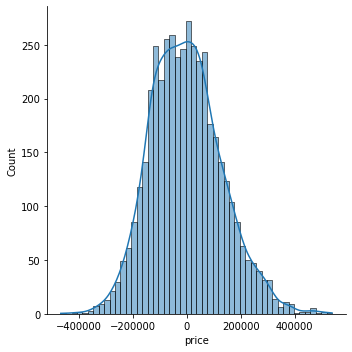

In [92]:
#Residual Plot distribution
sns.displot((y_test-y_pred), bins = 50, kde = True)
plt.show()

> Residual plot shows that the distribution of residuals is normal which indicates that they are due to random chance which is good for any model especially those based on assumptions of normality like Multiple Linear Regression.

### Assessing Heteroskedasticity using Barlett's test

In [ ]:
#Installing module to perform Barlett's test on Dataset
!pip install pingouin

In [94]:
#Performing Barlett's test
import pingouin as pg
pg.homoscedasticity(house_cc, method="bartlett", alpha=.05)


,T,pval,equal_var
bartlett,92976.205445,0.0,False


>The above test of Homoscedasticity returns ‘T’ for Bartlett's test, 'pval': p-value and 'equal_var': True if data has equal variance. From the above results we can see that pval is significant meaning that we reject Null hypothesis (the data has equal variance). Thus there's sufficient evidence to show that the dataset has Heteroskedasticity thereby violating an assumption that MLR is based on. This means using MLR is not best for this data.

### MLR Coefficients

In [95]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 54021.17318228338,
 'bedrooms': 7154.451022137602,
 'condition': 11665.518001925207,
 'floors': 42425.4126531096,
 'grade': 113228.95471113305,
 'last_renovation': -665.8643456860353,
 'sqft_basement': 40.78508611561847,
 'sqft_lot': 0.44791625656944234,
 'sqft_lot15': -1.2093415836134227,
 'view': 20665.265377974425,
 'waterfront': 34451.665849001285,
 'yr_built': -2497.0305398094088,
 'yr_renovated': 20.042863439705798,
 'zipcode': -20.42578975135723}

In [96]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(regressor.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,7154.451022
bathrooms,54021.173182
sqft_lot,0.447916
floors,42425.412653
waterfront,34451.665849
view,20665.265378
condition,11665.518002
grade,113228.954711
sqft_basement,40.785086
yr_built,-2497.030540


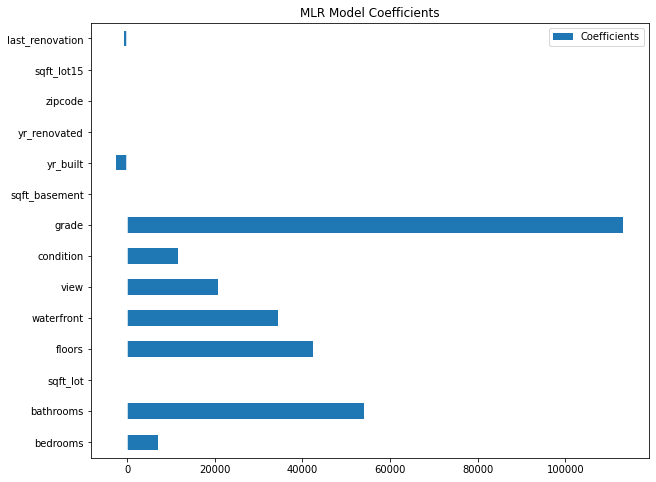

In [97]:
#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('MLR Model Coefficients')
plt.axvline(x=0, color='1')
plt.show()
# From the above we can see that empmed, median duration of unemployment, in weeks and
# psavert, personal savings rate are the highest contributors to unemployement.

> The major factors positively affecting price according to MLR are grade of the house which shows that a unit increase in house grade results in approximately 113,000USD (assuming price is in USD) increase in price of house followed by number of bathrooms which shows that a unit increase in number of bathrooms in a house (holding other features constant) results in an increase in house price of approximately 5,400USD. Conversely year built negatively affects the price that is a unit increase in year built(age of the house) results in a drop in price by about 2,400USD.

## Quantile Regression

In [159]:
#features and label
X = house_c.drop('price', axis=1)
y = house_c['price']

#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [160]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
#Create a X_train dataframe
df_x = pd.DataFrame(data=X_train, columns= X.columns )

#y_train into df and combine
ys = pd.Series(y_train, name="Price")
ys_df = ys.to_frame()
ys_df = ys_df.reset_index()
ys_df.drop('index', axis=1, inplace=True)
ys_df.head()

#Combining the X_train and y_train to create a Train Dataframe
df_trn = pd.concat([df_x,ys_df], axis=1)
df_trn.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation,Price
0,-0.383984,-1.628252,-0.646029,-0.659736,-0.917940,-0.090676,-0.308729,0.912568,-0.561066,-1.028214,0.466354,-1.050183,-0.213973,0.692746,0.646138,-0.493164,-0.195702,495000.0
1,-0.383984,0.670942,-0.346063,0.354942,-0.917940,-0.090676,-0.308729,0.912568,0.288989,-0.812460,0.624148,0.306459,-0.213973,-1.344480,0.836701,0.288055,-0.195702,635000.0
2,-0.383984,-0.861854,-1.331666,0.144614,-0.917940,-0.090676,-0.308729,-0.625578,0.288989,-0.997392,-0.660743,0.543871,-0.213973,-0.073550,-0.715028,0.326175,-0.195702,382500.0
3,1.064333,0.670942,0.268153,-0.369749,0.925082,-0.090676,-0.308729,-0.625578,0.288989,0.728640,-0.660743,0.747367,-0.213973,-0.877227,-0.715028,-0.347274,-0.195702,382500.0
4,-0.383984,0.670942,-0.317495,-0.797799,0.925082,-0.090676,-0.308729,-0.625578,-0.561066,-0.766227,0.601606,0.476039,-0.213973,0.767507,0.809478,-0.873656,-0.195702,670000.0


### 0.5 Quantile Regression:

In [171]:
#Getting summary report of dataset at 0.5 Quantile
mod = smf.quantreg('Price ~ view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + sqft_living15 + sqft_lot15 + last_renovation', df_trn)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.4089
Model:                       QuantReg   Bandwidth:                   2.380e+04
Method:                 Least Squares   Sparsity:                    3.124e+05
Date:                Fri, 19 Feb 2021   No. Observations:                17290
Time:                        18:12:09   Df Residuals:                    17278
                                        Df Model:                           11
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.964e+05   1187.790    417.943      0.000    4.94e+05    4.99e+05
view             1.557e+04   1302.927     11.953      0.000     1.3e+04    1.81e+04
condition        1.071e+04   1329.248      8.053      0.000    8099.630    1.33e+04
grade            1.225e+05 

In [172]:
#Creating test dataframe
df_xt = pd.DataFrame(data=X_test, columns= X.columns )

#y_train into df and combine
yst = pd.Series(y_test, name="Price")
yst_df = yst.to_frame()
yst_df = yst_df.reset_index()
yst_df.drop('index', axis=1, inplace=True)
yst_df

df_test = pd.concat([df_xt,yst_df], axis=1)
df_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation,Price
0,-1.832301,-0.861854,-0.846007,-1.064092,2.768105,-0.090676,-0.308729,-0.625578,-0.561066,-0.473418,-0.660743,0.950863,-0.213973,0.879648,-0.715028,-1.131647,-0.195702,297000.0
1,1.064333,1.437339,1.753699,2.276658,0.925082,-0.090676,-0.308729,0.912568,3.689210,1.869054,-0.660743,0.577787,-0.213973,-1.363171,-0.715028,2.206373,-0.195702,887000.0
2,-1.832301,-1.628252,-0.831722,-0.994266,-0.917940,-0.090676,-0.308729,-0.625578,-0.561066,-0.827871,-0.119736,-1.932000,-0.213973,0.543225,-0.061668,-0.982603,-0.195702,562100.0
3,-1.832301,-1.628252,-1.274530,-1.064092,-0.917940,-0.090676,-0.308729,0.912568,0.288989,-0.935748,-0.660743,-1.491091,-0.213973,0.580605,-0.715028,-1.131647,-0.195702,631500.0
4,1.064333,0.670942,1.653711,0.096745,0.925082,-0.090676,2.285017,-0.625578,1.139045,1.869054,-0.660743,1.052611,-0.213973,1.440353,-0.715028,1.596598,-0.195702,780000.0


In [173]:
#Predicting
pred = res.predict(df_test)
pred


0       317905.958664
1       984950.037829
2       490865.276120
3       552447.090194
4       685883.072967
            ...      
4318    762218.636598
4319    308768.593409
4320    331387.615589
4321    299310.782380
4322    361707.951299
Length: 4323, dtype: float64

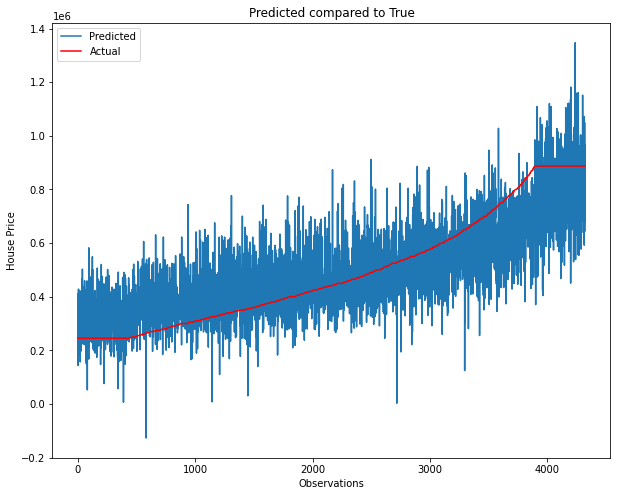

In [238]:
# Observations sorted by y_test values
# higher indices means higher HousePrice
d_obs = pd.DataFrame({'y_test':df_test['Price'],'y_pred': pred})
d_obs.sort_values(by=['y_test'],inplace=True)

# Plot the y_test and the prediction (pred)
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_pred'], markersize=10, label='Predicted')
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_test'],'r-',markersize=10, label='Actual', alpha=1)
plt.ylabel('House Price')
plt.xlabel('Observations')
plt.title('Predicted compared to True')
plt.legend(loc='upper left')
plt.show()

> The predictions can be seen to vary across (blue line spikes) the dataset. This is not a good thing for out models, shows instability.

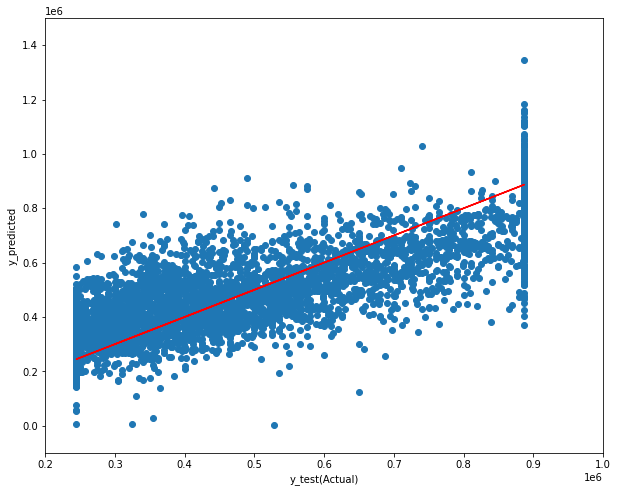

In [240]:
#Residuals
fig = plt.figure(figsize=(10, 8))
plt.scatter(y_test, pred)
plt.ylim(-100000, 1500000)
plt.xlim(200000, 1000000)
plt.plot(y_test, y_test, "r")
plt.xlabel('y_test(Actual)')
plt.ylabel('y_predicted');

#See how the relative residuals are distributed across testing sample

As can be noted above as the predicted gets into the higher house price values it is widely distributed(higher variance).

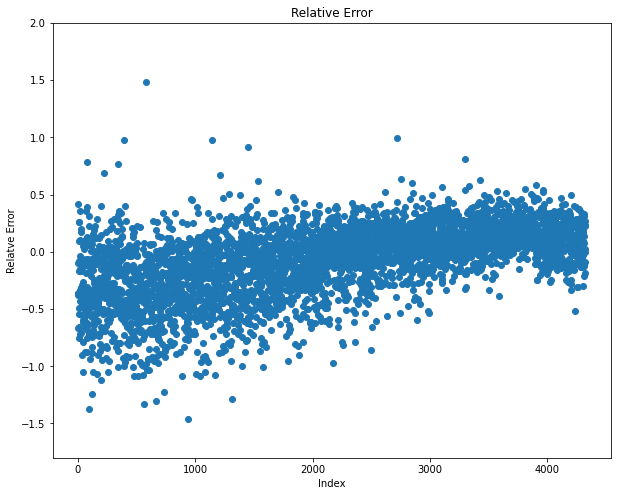

In [244]:
#Relative Error Plot
# Relatve Error = (y_test - predicted)/y_test
fig = plt.figure(figsize=(10, 8))
plt.scatter(np.arange(0,len(d_obs),1), (d_obs['y_test'] - d_obs['y_pred'])/d_obs['y_test'] )
plt.ylim(-1.8,2.0)
plt.ylabel('Relatve Error')
plt.xlabel('Index')
plt.title('Relative Error');
#Observations were sorted by y_test values meaning higher indices mean higher House Price

It can be noted that at the lower indices the variance is high. In an even variance dataset the plot will appear tight like a horizontal line but this pyramid shape tells us that there's heteroskedasticity in the data.

In [201]:
# Showing the RMSE, MSE & R-squared
print('Accuracy on Testing Sample:')
print('MSE       = %f' % (mean_squared_error(y_test, pred)))
print('RMSE       = %f' % (np.sqrt(mean_squared_error(y_test, pred))))
print('R-Squared   = %f' % (r2_score(y_test, pred)))

Accuracy on Testing Sample:
MSE       = 16522775595.078049
RMSE       = 128540.949098
R-Squared   = 0.616789


The R-squared is about 61.6% which is better than MLR at 59% meaning the median quantile regression produces a more accurate model compared to MLR. A possible reason for the better performance of Median is that it is more robust to outliers than the mean which is used in MLR.

### 0.25 Quantile Regression:

In [245]:
#Getting summary report of dataset at 0.25 Quantile
mod = smf.quantreg('Price ~ view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + sqft_living15 + sqft_lot15 + last_renovation', df_trn)
res = mod.fit(q=.25)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.3214
Model:                       QuantReg   Bandwidth:                   2.149e+04
Method:                 Least Squares   Sparsity:                    3.526e+05
Date:                Fri, 19 Feb 2021   No. Observations:                17290
Time:                        19:00:46   Df Residuals:                    17278
                                        Df Model:                           11
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.078e+05   1161.242    351.134      0.000    4.05e+05     4.1e+05
view             1.544e+04   1239.385     12.461      0.000     1.3e+04    1.79e+04
condition        6641.1644   1300.908      5.105      0.000    4091.253    9191.076
grade            1.144e+05 

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [246]:
#Creating test dataframe
df_xt = pd.DataFrame(data=X_test, columns= X.columns )

#y_train into df and combine
yst = pd.Series(y_test, name="Price")
yst_df = yst.to_frame()
yst_df = yst_df.reset_index()
yst_df.drop('index', axis=1, inplace=True)
yst_df

df_test = pd.concat([df_xt,yst_df], axis=1)
df_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation,Price
0,-1.832301,-0.861854,-0.846007,-1.064092,2.768105,-0.090676,-0.308729,-0.625578,-0.561066,-0.473418,-0.660743,0.950863,-0.213973,0.879648,-0.715028,-1.131647,-0.195702,297000.0
1,1.064333,1.437339,1.753699,2.276658,0.925082,-0.090676,-0.308729,0.912568,3.689210,1.869054,-0.660743,0.577787,-0.213973,-1.363171,-0.715028,2.206373,-0.195702,887000.0
2,-1.832301,-1.628252,-0.831722,-0.994266,-0.917940,-0.090676,-0.308729,-0.625578,-0.561066,-0.827871,-0.119736,-1.932000,-0.213973,0.543225,-0.061668,-0.982603,-0.195702,562100.0
3,-1.832301,-1.628252,-1.274530,-1.064092,-0.917940,-0.090676,-0.308729,0.912568,0.288989,-0.935748,-0.660743,-1.491091,-0.213973,0.580605,-0.715028,-1.131647,-0.195702,631500.0
4,1.064333,0.670942,1.653711,0.096745,0.925082,-0.090676,2.285017,-0.625578,1.139045,1.869054,-0.660743,1.052611,-0.213973,1.440353,-0.715028,1.596598,-0.195702,780000.0


In [247]:
#Predicting
pred = res.predict(df_test)
pred


0       262975.148402
1       843432.062740
2       404649.550453
3       466129.925884
4       596493.471032
            ...      
4318    648264.915905
4319    240105.654308
4320    262837.211038
4321    238207.206182
4322    278344.438503
Length: 4323, dtype: float64

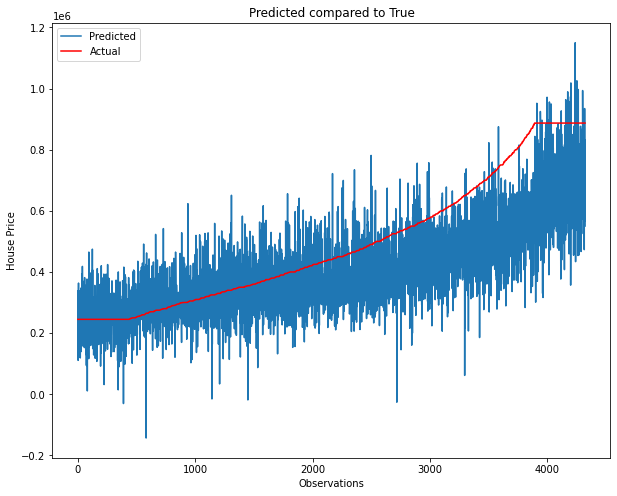

In [248]:
# Observations sorted by y_test values
# higher indices means higher HousePrice
d_obs = pd.DataFrame({'y_test':df_test['Price'],'y_pred': pred})
d_obs.sort_values(by=['y_test'],inplace=True)

# Plot the y_test and the prediction (pred)
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_pred'], markersize=10, label='Predicted')
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_test'],'r-',markersize=10, label='Actual', alpha=1)
plt.ylabel('House Price')
plt.xlabel('Observations')
plt.title('Predicted compared to True')
plt.legend(loc='upper left')
plt.show()

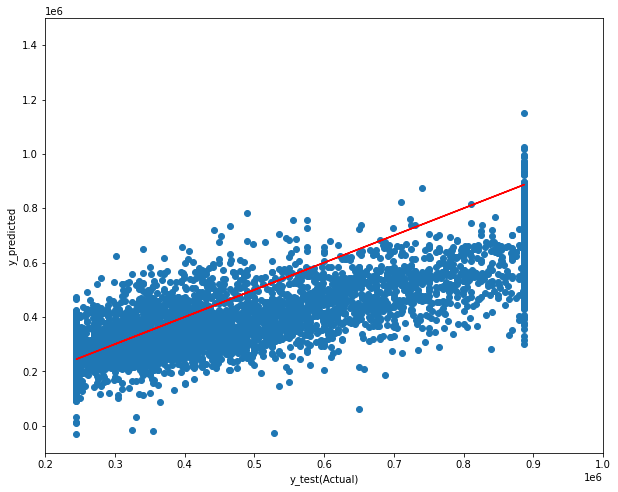

In [249]:
#Residuals
fig = plt.figure(figsize=(10, 8))
plt.scatter(y_test, pred)
plt.ylim(-100000, 1500000)
plt.xlim(200000, 1000000)
plt.plot(y_test, y_test, "r")
plt.xlabel('y_test(Actual)')
plt.ylabel('y_predicted');

#See how the relative residuals are distributed across testing sample

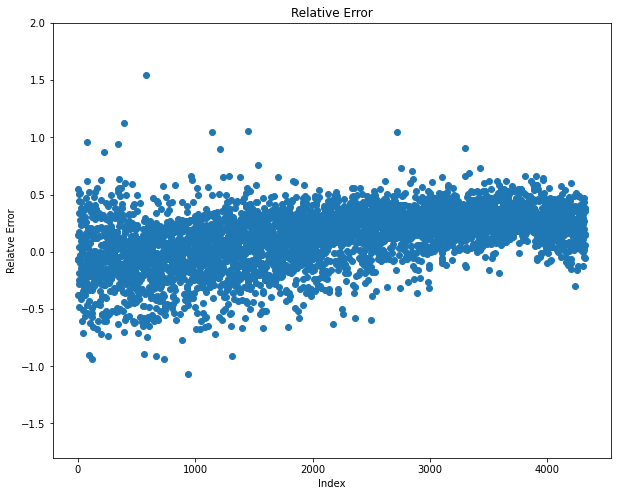

In [250]:
#Relative Error Plot
# Relatve Error = (y_test - predicted)/y_test
fig = plt.figure(figsize=(10, 8))
plt.scatter(np.arange(0,len(d_obs),1), (d_obs['y_test'] - d_obs['y_pred'])/d_obs['y_test'] )
plt.ylim(-1.8,2.0)
plt.ylabel('Relatve Error')
plt.xlabel('Index')
plt.title('Relative Error');
#Observations were sorted by y_test values meaning higher indices mean higher House Price

In [251]:
# Showing the RMSE, MSE & R-squared
print('Accuracy on Testing Sample:')
print('MSE       = %f' % (mean_squared_error(y_test, pred)))
print('RMSE       = %f' % (np.sqrt(mean_squared_error(y_test, pred))))
print('R-Squared   = %f' % (r2_score(y_test, pred)))

Accuracy on Testing Sample:
MSE       = 24326505663.436157
RMSE       = 155969.566466
R-Squared   = 0.435799


The R-squared is about 43.6% which is the worst so far. The median still remains the better one.

### 0.75 Quantile Regression:

In [252]:
#Getting summary report of dataset at 0.25 Quantile
mod = smf.quantreg('Price ~ view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + sqft_living15 + sqft_lot15 + last_renovation', df_trn)
res = mod.fit(q=.75)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.4534
Model:                       QuantReg   Bandwidth:                   2.066e+04
Method:                 Least Squares   Sparsity:                    4.129e+05
Date:                Fri, 19 Feb 2021   No. Observations:                17290
Time:                        19:08:56   Df Residuals:                    17278
                                        Df Model:                           11
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.833e+05   1360.168    428.863      0.000    5.81e+05    5.86e+05
view              1.89e+04   1541.904     12.260      0.000    1.59e+04    2.19e+04
condition         1.11e+04   1532.727      7.244      0.000    8098.348    1.41e+04
grade            1.149e+05 

In [253]:
#Creating test dataframe
df_xt = pd.DataFrame(data=X_test, columns= X.columns )

#y_train into df and combine
yst = pd.Series(y_test, name="Price")
yst_df = yst.to_frame()
yst_df = yst_df.reset_index()
yst_df.drop('index', axis=1, inplace=True)
yst_df

df_test = pd.concat([df_xt,yst_df], axis=1)
df_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,last_renovation,Price
0,-1.832301,-0.861854,-0.846007,-1.064092,2.768105,-0.090676,-0.308729,-0.625578,-0.561066,-0.473418,-0.660743,0.950863,-0.213973,0.879648,-0.715028,-1.131647,-0.195702,297000.0
1,1.064333,1.437339,1.753699,2.276658,0.925082,-0.090676,-0.308729,0.912568,3.689210,1.869054,-0.660743,0.577787,-0.213973,-1.363171,-0.715028,2.206373,-0.195702,887000.0
2,-1.832301,-1.628252,-0.831722,-0.994266,-0.917940,-0.090676,-0.308729,-0.625578,-0.561066,-0.827871,-0.119736,-1.932000,-0.213973,0.543225,-0.061668,-0.982603,-0.195702,562100.0
3,-1.832301,-1.628252,-1.274530,-1.064092,-0.917940,-0.090676,-0.308729,0.912568,0.288989,-0.935748,-0.660743,-1.491091,-0.213973,0.580605,-0.715028,-1.131647,-0.195702,631500.0
4,1.064333,0.670942,1.653711,0.096745,0.925082,-0.090676,2.285017,-0.625578,1.139045,1.869054,-0.660743,1.052611,-0.213973,1.440353,-0.715028,1.596598,-0.195702,780000.0


In [254]:
#Predicting
pred = res.predict(df_test)
pred

0       3.995864e+05
1       1.059574e+06
2       5.667704e+05
3       6.184104e+05
4       7.840801e+05
            ...     
4318    8.468004e+05
4319    3.809991e+05
4320    4.142606e+05
4321    3.731135e+05
4322    4.405756e+05
Length: 4323, dtype: float64

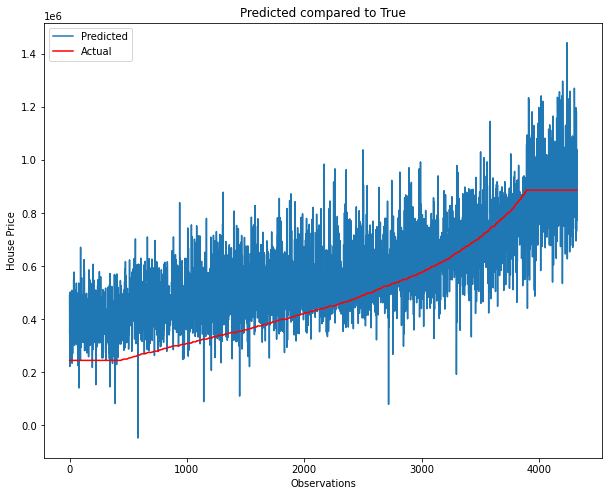

In [255]:
# Observations sorted by y_test values
# higher indices means higher HousePrice
d_obs = pd.DataFrame({'y_test':df_test['Price'],'y_pred': pred})
d_obs.sort_values(by=['y_test'],inplace=True)

# Plot the y_test and the prediction (pred)
fig = plt.figure(figsize=(10, 8))
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_pred'], markersize=10, label='Predicted')
plt.plot(np.arange(0,len(d_obs),1), d_obs['y_test'],'r-',markersize=10, label='Actual', alpha=1)
plt.ylabel('House Price')
plt.xlabel('Observations')
plt.title('Predicted compared to True')
plt.legend(loc='upper left')
plt.show()

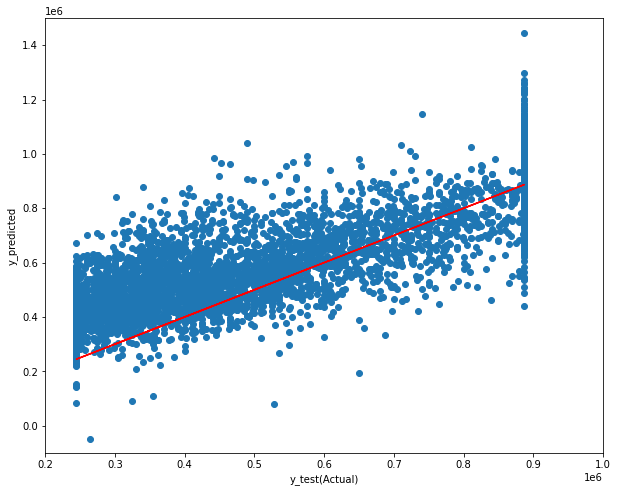

In [256]:
#Residuals
fig = plt.figure(figsize=(10, 8))
plt.scatter(y_test, pred)
plt.ylim(-100000, 1500000)
plt.xlim(200000, 1000000)
plt.plot(y_test, y_test, "r")
plt.xlabel('y_test(Actual)')
plt.ylabel('y_predicted');

#See how the relative residuals are distributed across testing sample

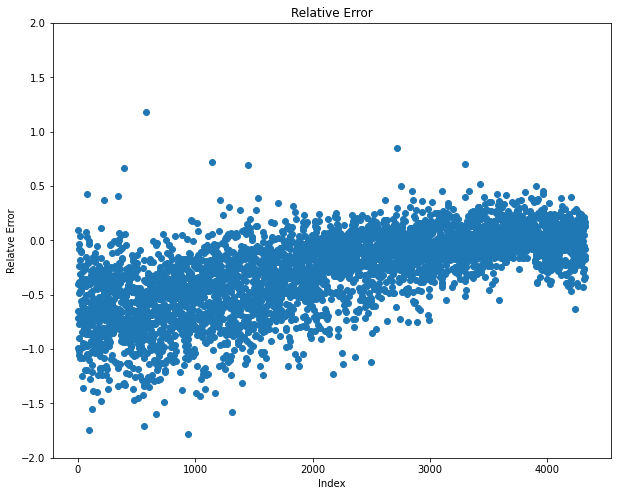

In [258]:
#Relative Error Plot
# Relatve Error = (y_test - predicted)/y_test
fig = plt.figure(figsize=(10, 8))
plt.scatter(np.arange(0,len(d_obs),1), (d_obs['y_test'] - d_obs['y_pred'])/d_obs['y_test'] )
plt.ylim(-2.0,2.0)
plt.ylabel('Relatve Error')
plt.xlabel('Index')
plt.title('Relative Error');
#Observations were sorted by y_test values meaning higher indices mean higher House Price

In [259]:
# Showing the RMSE, MSE & R-squared
print('Accuracy on Testing Sample:')
print('MSE       = %f' % (mean_squared_error(y_test, pred)))
print('RMSE       = %f' % (np.sqrt(mean_squared_error(y_test, pred))))
print('R-Squared   = %f' % (r2_score(y_test, pred)))

Accuracy on Testing Sample:
MSE       = 24591782134.197693
RMSE       = 156817.671626
R-Squared   = 0.429646


The R-squared is about 43% which is the worst so far. The median quantile regression still remains the better one with a R-squared of about 61.6%

## Ridge Regression

In [301]:
# Data Preparation

# Setting up our X and y datasets
#Since Ridge Regression is not affected by multicollinearity we use the dataset that has collineated features
X = house_c.drop('price', axis=1)
y = house_c['price']

In [302]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [303]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [304]:
#ridge
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [305]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_) 

{'alpha': 0.0001}


16103843009.937134

In [306]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.0001)
ridge.fit(X_train,y_train)
second_model = (mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test)))
sec_model = (np.sqrt(mean_squared_error(y_true=y_test,y_pred=ridge.predict(X_test))))
rsecond_model = (r2_score(y_true=y_test,y_pred=ridge.predict(X_test)))
print("MSE: ", second_model)
print("RMSE: ", sec_model)
print("R-squared: ", rsecond_model)

MSE:  15727925490.667027
RMSE:  125411.02619254428
R-squared:  0.6352243231165035


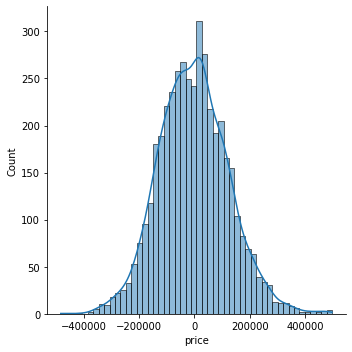

In [307]:
#Residual Plot distribution
y_pred=ridge.predict(X_test)
sns.displot((y_test-y_pred), bins = 50, kde = True)
plt.show()

In [308]:
# The 0.635 is better than the 0.596 which indicates that Ridge regression is better suited than MLR. 
# The coefficients show different weightings
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 11251.491665000265,
 'bedrooms': -14198.806089642665,
 'condition': 9293.553848836898,
 'floors': 16106.029851188405,
 'grade': 106143.73053826409,
 'last_renovation': -5263.037067651148,
 'sqft_above': -16636.205193341473,
 'sqft_basement': -15420.072759149956,
 'sqft_living': 96481.97934326254,
 'sqft_living15': 9476.108216920276,
 'sqft_lot': -6070.786248542231,
 'sqft_lot15': -8722.013137103158,
 'view': 15405.674334595515,
 'waterfront': 4053.0942170610956,
 'yr_built': -66194.77836099983,
 'yr_renovated': 5670.714036510507,
 'zipcode': 355.10818762193594}

In [309]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(ridge.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,-14198.806090
bathrooms,11251.491665
sqft_living,96481.979343
sqft_lot,-6070.786249
floors,16106.029851
waterfront,4053.094217
view,15405.674335
condition,9293.553849
grade,106143.730538
sqft_above,-16636.205193


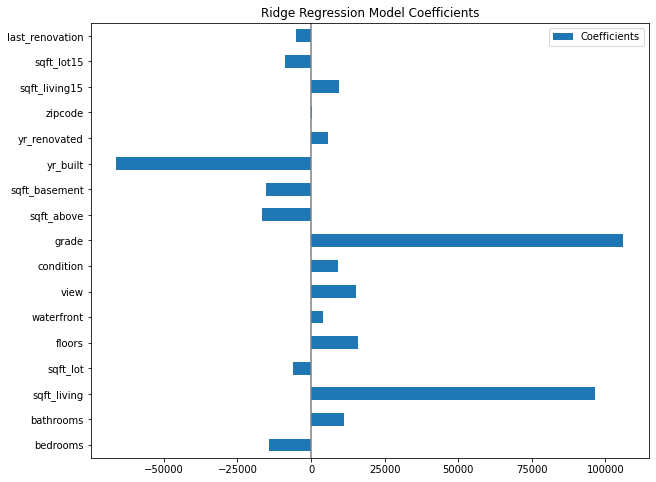

In [310]:
#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Ridge Regression Model Coefficients')
plt.axvline(x=0, color='.5')
plt.show()

> Ridge model proved to provide a better model than MLR (63% R-squared compared to approx 60%) and Median Quantile Regression(which was the best among 0.25,0.5 & 0.75 Quantiles and it had an R-squared of 61.6%). The RMSE dropped by about 1% in Ridge compared to MLR (RMSE compared to mean price).

>It is interesting that the coefficients weights changed compared to MLR this is because of the L2 regularization that it imposes on the model. Since Ridge regression can handle multicollinearity we see that sqft_living has a major influence on house prices which makes sense though we had to drop it in MLR due to it's high VIF score. Similarly age of the house (year built) has a marked influence on price than reflected in MLR. Still the top feature is grade same as in MLR.

## Lasso Regression

In [311]:
# Features and label
X = house_c.drop('price', axis=1)
y = house_c['price']

In [312]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [313]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [314]:
#setting parameter space
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#lasso regression
lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))
print("lasso R-squared:", r2_score(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 8.0}
lasso score: 0.6352236084792842
lasso MSE: 15727956303.46966
lasso RMSE: 125411.1490397471
lasso R-squared: 0.6352236084792842
lasso best estimator coef: [-14186.55  11232.41  96442.48  -6068.66  16093.52   4047.79  15395.73
   9287.55 106141.64 -16592.12 -15232.4  -66185.9    5576.33    354.78
   9310.89  -8721.98  -5165.05]


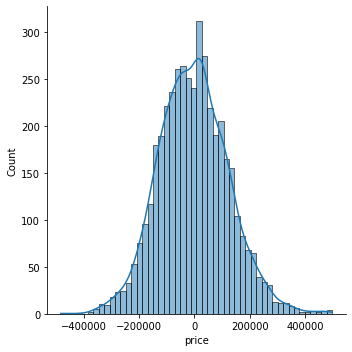

In [315]:
#Residual Plot distribution
y_pred = gridlasso.predict(X_test)
sns.displot((y_test-y_pred), bins = 50, kde = True)
plt.show()

In [316]:
# The 0.4516 is marginally lower than the 0.452 which indicate that there is little difference between the lasso, ridge and MLR models. 
# The coefficients show different weightings
# 
coef_dict_baseline = {}
for coef, feat in zip(gridlasso.best_estimator_.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 11232.411655112875,
 'bedrooms': -14186.549113345181,
 'condition': 9287.551464278533,
 'floors': 16093.520740427108,
 'grade': 106141.64032893653,
 'last_renovation': -5165.046569614865,
 'sqft_above': -16592.11808613703,
 'sqft_basement': -15232.400137492497,
 'sqft_living': 96442.47504966152,
 'sqft_living15': 9310.894562306541,
 'sqft_lot': -6068.663146148698,
 'sqft_lot15': -8721.981673991615,
 'view': 15395.72867812218,
 'waterfront': 4047.7890224269595,
 'yr_built': -66185.8982203423,
 'yr_renovated': 5576.333244475706,
 'zipcode': 354.78258634948185}

In [317]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(gridlasso.best_estimator_.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,-14186.549113
bathrooms,11232.411655
sqft_living,96442.475050
sqft_lot,-6068.663146
floors,16093.520740
waterfront,4047.789022
view,15395.728678
condition,9287.551464
grade,106141.640329
sqft_above,-16592.118086


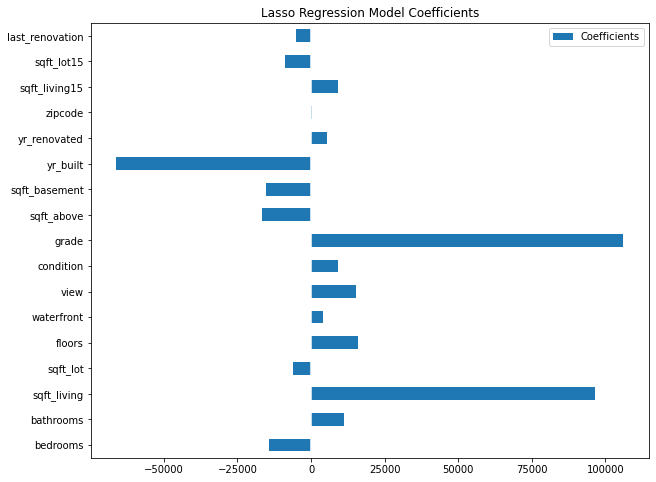

In [318]:
#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Lasso Regression Model Coefficients')
plt.axvline(x=0, color='1')
plt.show()

> Lasso model proved to provide an almost similar model to Ridge. However it gave a model with a slightly higher MSE than Ridge though the R-squared was almost the same with Ridge. L1 regularization is the one used for lasso regression. But here we can note none of the features were reduced to zero and thus dropped. This means all the features are important in predicting house price. In this case it would be better to use Ridge since there's no danger of feature selection especially with a dataset that has a low number of features such as this one. Additionally Ridge handles multicollinear variables and won't reduce them like Lasso.

## Elastic Net Regression

In [319]:
# Features and label
X = house_c.drop('price', axis=1)
y = house_c['price']

In [320]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [321]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [322]:
# Elastic Net Model
 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [323]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


16200415048.010914

In [324]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)

elastic.fit(X_train,y_train)
third_model=(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
th_m = np.sqrt(mean_squared_error(y_true=y_test,y_pred=elastic.predict(X_test)))
third_m = r2_score(y_true=y_test,y_pred=elastic.predict(X_test))
print("MSE: ", third_model)
print("RMSE:", th_m)
print("R-squared: ", third_m)


# With these settings we got an R-square of only 45% . 
# Which means that elastic net is doing worse than linear, lasso and ridge regression. 

MSE:  15730082858.496294
RMSE: 125419.62708641855
R-squared:  0.6376472114627172


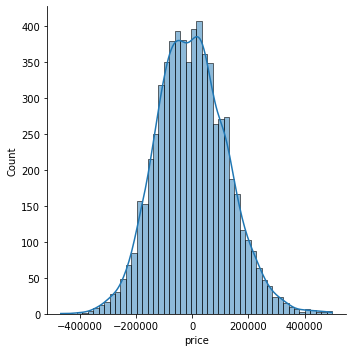

In [325]:
#Residual Plot distribution
y_pred=elastic.predict(X_test)
sns.displot((y_test-y_pred), bins = 50, kde = True)
plt.show()

In [326]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that view has been greatly minimized in the elastic net version. 
# This means that this values was not as important to the algorithm.

{'bathrooms': 11580.158656219264,
 'bedrooms': -11880.627225792898,
 'condition': 9752.85124124827,
 'floors': 13615.001946270657,
 'grade': 99090.88999654823,
 'last_renovation': -2012.3628889222762,
 'sqft_above': 15848.198245393074,
 'sqft_basement': -4988.52381330271,
 'sqft_living': 62328.49042065344,
 'sqft_living15': 15522.328651544285,
 'sqft_lot': -4710.2997373123735,
 'sqft_lot15': -8396.079028021353,
 'view': 15151.498461096664,
 'waterfront': 4566.018844859324,
 'yr_built': -60850.86554941588,
 'yr_renovated': 3570.3876427977634,
 'zipcode': 2512.2562397464735}

In [327]:
#creating df of coefficients
features = X.columns
feat_coef = pd.DataFrame(elastic.coef_, columns=['Coefficients'], index=features)
feat_coef

,Coefficients
bedrooms,-11880.627226
bathrooms,11580.158656
sqft_living,62328.490421
sqft_lot,-4710.299737
floors,13615.001946
waterfront,4566.018845
view,15151.498461
condition,9752.851241
grade,99090.889997
sqft_above,15848.198245


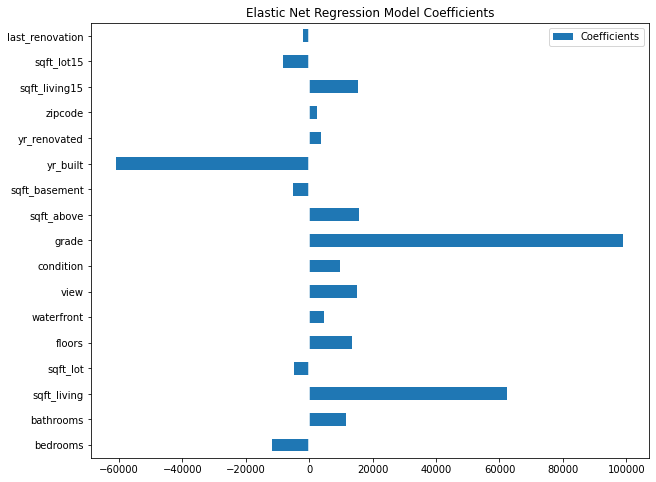

In [328]:
#Displaying coefs
feat_coef.plot(kind='barh', figsize=(10, 8))
plt.title('Elastic Net Regression Model Coefficients')
plt.axvline(x=0, color='1')
plt.show()

> Elastic Net model provided the best model in comparison to Ridge, Lasso, MLR and Quantile Regression(0.25,0.5 & 0.75 quantiles). It had a R-squared of about 63.8%. It is important to note how it used mostly L1 regularization (at 0.8 L1_ratio) to reduce some feature weights like ZipCode which was almost zero but did not remove them (compare Lasso and Elastic Net).This balancing effect is because of the L2 regularization effect. This is where Elastic Net shines through, performing feature selection whilst maintaining any correlated features in the model. In this case though it's R squared was better with a slightly higher MSE which is expected because it utilises both penalty types unlike the other models. In this case Elastic Net Regression offers the best performance and should be used.

# Challenging the Solution


> It is possible to improve the models used above by trying other Regression types such as Polynomial Regression. Additionally we've not used location information (a cross feature of latitude and longitude) that could possibly allow the models used to learn about correlations in housing blocks as compared to ZipCodes which are too expansive. This may produce higher R-squared values and hence better model performance.

# Follow up questions

## a) Did we have the right data?


> It may be possible to answer this question conclusively once we've included the latitude and longitude and observed the model/evaluated it. But with all other features except the 2 features we get models that explain about 60% of the variance in the data with the best performance coming from Elastic Net Regression model at about 63.7%. So we can say we have some of the right data.

## b) Do we need other data to answer our question?

> In line with the issue of right data, it is recommended that indeed we should increase the number of explanatory variables/features that explain the house prices thus enabling us to get better prediction models.



## c) Did we have the right question?

> Given the dataset and the business objective, the right question was asked and explored. The only hindrance to achieving success in this case is we didn't have enough features(data explaining house prices).